<font size=6 color='purple'>**Main plotting script and data curation for paper (so far)**</font>

*Notes:* Initialization cells must be run before plotting, since they define colors and snapshot numbers


In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gd
from utils.paths import SetupPaths
from utils.get_summary_data import compile_summary
from vectorCorrection import vectorCorrection as vector


paths = SetupPaths()

In [63]:
plt.rcParams.update({'font.size':20})

# Initialization

In [9]:
palette = {"Illustris":"#668AFF","TNG": "#B6DAFF",
           "dark":"#044751","hydro": "#B6DAFF", 
           
           "Illustris dark": "#009292", "Illustris hydro": "#B6DAFF",
           "TNG dark": "#930200", "TNG hydro": "#FFB5DC",
           
           "All Pairs":"#668AFF","Major Pairs": "#7B55F3",
           "Minor Pairs":'#FFB201',"Minor Plus Pairs":"#FF6300",
                      
           "Extra":"#DE2280","Stellar":"#0A68DD",
           "Halo":"#4B0094","Max Halo":"#FF6BB7"}


In [10]:
zs = {"z":np.array([0,1,2,3,4]), "zill":np.array([135,85,68,60,56]), "ztng":np.array([99,50,33,25,22])}

## Function defs

In [11]:
# make functions to get data at the requested snapshot
def get_primmask(primstells, size):
    if size == "dwarf":
        mask = (primstells > 0.01) & (primstells < 0.5)
    elif size == "massive":
        mask = (primstells > 0.5) & (primstells < 10)
    return mask

def get_groupmask(groupmass, size):
    if size == "dwarf":
        mask = (groupmass > 8) & (groupmass < 50)
    elif size == "massive":
        mask = (groupmass > 100) & (groupmass < 650)
    return mask

In [ ]:
class EmptyFile(Exception): pass
class SkipRedshift(Exception): pass
# need to use different redshift cuts cause 54 dne, and 53+55 hydro dne

# function to get the halo counts 
def get_counts(sim, phys, size, z, groupCut=False, median=False, errorprint=False, redshiftcutoff=True):    
    if sim == "Illustris":
        snapshots = np.arange(0,136,1)
        snapshots.remove(113)
        redcutoff = 3.8
    elif sim == "TNG":
        snapshots = np.arange(0,100,1)
        snapshots.remove(48)
        redcutoff = 4
        
    redshifts, medians, quarts, unpairs, pairs = [], [], [], [], []
       
    for snap in snapshots:            
        try:
            pair_path = f"{sim}_{snapnum}_10.hdf5"
            pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
            redshift = pair_data['Header'].attrs['Redshift']
            
            if len(pair_data['pairs'][phys]['Group ID']) == 0:
                raise EmptyFile
                
            if redshiftcutoff & ( redshift > redcutoff) :
                raise SkipRedshift
                
            unpaired = pair_data["unpaired"][phys]
            unpaired_stells = np.array(unpaired["Sub1 Stellar Mass"])
            unpaired_prims = get_primmask(unpaired_stells, size)
            unpaired_group = get_groupmask(np.array(unpaired["Group Mass"]), size)                
            unpaired_median = unpaired['Realization']==-1
            
            paired = pair_data["paired"][phys]
            paired_stells = np.array(paired["Sub1 Stellar Mass"])
            paired_prims = get_primmask(paired_stells, size)
            paired_group = get_groupmask(np.array(paired["Group Mass"]), size)
            paired_median = paired['Realization']==-1

                
            if median:
                if groupCut:
                    unpaired_mask = unpaired_prims & unpaired_group & unpaired_median
                    paired_mask = paired_prims & paired_group & paired_median
                
                else: 
                    unpaired_mask = unpaired_prims & unpaired_median
                    paired_mask = paired_prims & paired_median
                
                num_unpaired = np.count_nonzero(unpaired_mask)
                num_paired = np.count_nonzero(paired_mask)
                num_prims = num_unpaired + num_paired             
                quarts = [0,0]

                
            else: 
                unpaired_per_real = []
                paired_per_real = []
                total_per_real = []
                
                
                for in 
                
            z.append(redshift)
            unpairs.append( num_unpaired )
            pairs.append( num_paired )
            medians.append( num_prims )
            quarts.append( quarts )
            
                
            
            ############
            
            realarray = np.unique(np.array(pair_data['pairs']['dark']['Realization']))
            num_prims_per_real = []
            num_unpaired_per_real = []
            num_pairs_per_real = []
            for realization in realarray:
                # find num of unpaired prims:
                unpaired_stells = np.array(pair_data['unpaired'][it_phys]['Sub1 Stellar Mass'])
                unpaired_realization = np.array(pair_data['unpaired'][it_phys]['Realization'])

                mask_prims = (unpaired_stells > 0.01) & (unpaired_stells < 0.5)
                mask_real = unpaired_realization == realization

                num_unpairedprims = np.count_nonzero(mask_real & mask_prims)
                num_unpaired_per_real.append(num_unpairedprims)

                # find num of paired prims:
                paired_stells = np.array(pair_data['pairs'][it_phys]['Sub1 Stellar Mass'])
                paired_realization = np.array(pair_data['pairs'][it_phys]['Realization'])

                mask_prims = (paired_stells > 0.01) & (paired_stells < 0.5)
                mask_real = paired_realization == realization

                num_pairedprims = np.count_nonzero(mask_real & mask_prims)
                num_pairs_per_real.append(num_pairedprims)

                # find total number of primaries
                tot_numprims = num_unpairedprims + num_pairedprims
                num_prims_per_real.append(tot_numprims)
                
            z.append(pair_data['Header'].attrs['Redshift'])
            meds.append( np.median(num_prims_per_real) )
            quarts.append( np.percentile(num_prims_per_real,[16,84]) )
            meds_unpaired.append( np.median(num_unpaired_per_real) )
            meds_pairs.append( np.median(num_pairs_per_real) )
            
            pair_data.close()
            
            
            
            
            
            
            
            
            
            
            ###########
            
            
            
        
        except KeyError:
            if errorprint: print(f'skipping {snapnum}')
            continue
            
        except EmptyFile:
            if errorprint: print(f"skipping {snapnum}, empty file")
            continue
            
        except SkipRedshift:
            if errorprint: print(f"skipping {snapnum}, redshift out of range")
                
    count_dictionary = {"z":np.array(redshifts),
                        "medians": np.array(medians),
                        "quartiles": np.array(quarts),
                        "unpaired": np.array(unpairs),
                        "paired": np.array(pairs)}
    
    return count_dictionary
        
    pair_path = f"{sim}_{snapshot}_10.hdf5"
    pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
    
    unpaired = pair_data["unpaired"][phys]
    unpaired_stells = np.array(unpaired["Sub1 Stellar Mass"])
    unpaired_prims = get_primmask(unpaired_stells, size)
    unpaired_group = get_groupmask(np.array(unpaired["Group Mass"]), size)
    unpaired_median = unpaired['Realization']==-1
    
    paired = pair_data["pairs"][phys]
    paired_stells = np.array(paired["Sub1 Stellar Mass"])
    paired_prims = get_primmask(paired_stells, size)
    paired_group = get_groupmask(np.array(paired["Group Mass"]), size)
    paired_median = paired['Realization']==-1
    
    if groupCut & median:
        unpaired_mask = unpaired_prims & unpaired_group & unpaired_median
        unpaired_count = np.count_nonzero(unpaired_mask)
        
        paired_mask = paired_prims & paired_group & paired_median
        paired_count = np.count_nonzero(paired_mask)
        
    
    realarray = np.unique(np.array(unpaired['Realization']))
    

    
#     num_unpaired_per_real = []
#     num_paired_per_real = []  
    num_prims_per_real = []
    for it_real in realarray:
        # unpaired first
        unpaired_real = np.array(unpaired['Realization']) == it_real
        num_unpairedprims = np.count_nonzero(unpaired_prims & unpaired_real) # primaries in a realization
#         num_unpaired_per_real.append(num_unpairedprims)

        paired_real = np.array(paired['Realization']) == it_real
        num_pairedprims = np.count_nonzero(paired_prims & paired_real) # primaries in a realization
#         num_pairs_per_real.append(num_pairedprims)

        # find total number of primaries
        tot_numprims = num_unpairedprims + num_pairedprims
        num_prims_per_real.append(tot_numprims)
                
    
    return count_dictionary


## Make Illustris median count dataset

            
        try:
            pair_path = f"Illustris_{snapnum}_10.hdf5"
            pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
            realarray = np.unique(np.array(pair_data['pairs']['dark']['Realization']))
            
            if len(pair_data['pairs']['dark']['Group ID']) == 0:
                raise EmptyFile
                
            if pair_data['Header'].attrs['Redshift'] > redshiftcutoff_Ill:
                raise SkipRedshift
                        
            num_prims_per_real = []
            num_unpaired_per_real = []
            num_pairs_per_real = []
            for realization in realarray:
                # find num of unpaired prims:
                unpaired_stells = np.array(pair_data['unpaired'][it_phys]['Sub1 Stellar Mass'])
                unpaired_realization = np.array(pair_data['unpaired'][it_phys]['Realization'])

                mask_prims = (unpaired_stells > 0.01) & (unpaired_stells < 0.5)
                mask_real = unpaired_realization == realization

                num_unpairedprims = np.count_nonzero(mask_real & mask_prims)
                num_unpaired_per_real.append(num_unpairedprims)

                # find num of paired prims:
                paired_stells = np.array(pair_data['pairs'][it_phys]['Sub1 Stellar Mass'])
                paired_realization = np.array(pair_data['pairs'][it_phys]['Realization'])

                mask_prims = (paired_stells > 0.01) & (paired_stells < 0.5)
                mask_real = paired_realization == realization

                num_pairedprims = np.count_nonzero(mask_real & mask_prims)
                num_pairs_per_real.append(num_pairedprims)

                # find total number of primaries
                tot_numprims = num_unpairedprims + num_pairedprims
                num_prims_per_real.append(tot_numprims)
                
            z.append(pair_data['Header'].attrs['Redshift'])
            meds.append( np.median(num_prims_per_real) )
            quarts.append( np.percentile(num_prims_per_real,[16,84]) )
            meds_unpaired.append( np.median(num_unpaired_per_real) )
            meds_pairs.append( np.median(num_pairs_per_real) )
            
            pair_data.close()
        
        except KeyError:
            if errorprint: print(f'skipping {snapnum}')
            continue
            
        except EmptyFile:
            if errorprint: print(f"skipping {snapnum}, empty file")
            continue
            
        except SkipRedshift:
            if errorprint: print(f"skipping {snapnum}, redshift out of range")
            
    Illustris[it_phys] = {"z":z, "medians":meds, "quartiles":quarts, "unpaired":meds_unpaired, "paired": meds_pairs}
            
    print(f"{it_phys} complete")



In [130]:
# # TODO
# def get_counts_simstell(sim, phys, size, z, groupCut=False, median=False):
#     """ note: only z=0, 1, 2, 3, and 4 defined """
#     zloc = np.where( zs['z'] == z)[0]
    
#     if sim == "Illustris":
#         snapshot = zs['zill'][zloc][0]
#     elif sim == "TNG":
#         snapshot = zs['ztng'][zloc][0]      
        
#     pair_path = f"{sim}_{snapshot}_10.hdf5"
#     pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
    
#     unpaired = pair_data["unpaired"][phys]
#     unpaired_stells = np.array(unpaired["Sub1 Stellar Mass"])
#     unpaired_prims = get_primmask(unpaired_stells, size)
        
#     paired = pair_data["pairs"][phys]
#     paired_stells = np.array(paired["Sub1 Stellar Mass"])
#     paired_prims = get_primmask(paired_stells, size)
    
    
#     realarray = np.unique(np.array(unpaired['Realization']))
    
# #     num_unpaired_per_real = []
# #     num_paired_per_real = []  
#     num_prims_per_real = []
#     for it_real in realarray:
#         # unpaired first
#         unpaired_real = np.array(unpaired['Realization']) == it_real
#         num_unpairedprims = np.count_nonzero(unpaired_prims & unpaired_real) # primaries in a realization
# #         num_unpaired_per_real.append(num_unpairedprims)

#         paired_real = np.array(paired['Realization']) == it_real
#         num_pairedprims = np.count_nonzero(paired_prims & paired_real) # primaries in a realization
# #         num_pairs_per_real.append(num_pairedprims)

#         # find total number of primaries
#         tot_numprims = num_unpairedprims + num_pairedprims
#         num_prims_per_real.append(tot_numprims)
                
    
#     return np.array(num_prims_per_real)


# functions to get the primaries and secondaries based on AM mass
def get_primaries(sim, phys, size, z, key="Sub1 Mass", groupCut=False, median=False):
    zloc = np.where( zs['z'] == z)[0]
    
    if sim == "Illustris":
        snapshot = zs['zill'][zloc][0]
    elif sim == "TNG":
        snapshot = zs['ztng'][zloc][0]      
        
    pair_path = f"{sim}_{snapshot}_10.hdf5"
    pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
    
    # get data for unpaired halos first
    unpaired = pair_data["unpaired"][phys]
    unpaired_stells = np.array(unpaired["Sub1 Stellar Mass"])
    unpaired_prims = get_primmask(unpaired_stells, size)
    unpaired_group = get_groupmask(np.array(unpaired["Group Mass"]), size)
    unpaired_median = np.array( unpaired['Realization'] ) ==-1
    
    # get data for paired halos next
    paired = pair_data["pairs"][phys]
    paired_stells = np.array(paired["Sub1 Stellar Mass"])
    paired_prims = get_primmask(paired_stells, size)
    paired_group = get_groupmask(np.array(paired["Group Mass"]), size)
    paired_median = np.array( paired['Realization'] ) ==-1
    
    if groupCut & median:
        unpaired_mask = unpaired_prims & unpaired_group & unpaired_median
        paired_mask = paired_prims & paired_group & paired_median
        
    elif groupCut:
        unpaired_mask = unpaired_prims & unpaired_group 
        paired_mask = paired_prims & paired_group 
        
    elif median:
        unpaired_mask = unpaired_prims & unpaired_median
        paired_mask = paired_prims & paired_median
        
    else:
        unpaired_mask = unpaired_prims        
        paired_mask = paired_prims       
        
    unpaired_key = np.array(unpaired[key])[unpaired_mask]    
    paired_key = np.array(paired[key])[paired_mask]

    catkey = np.concatenate((unpaired_key,paired_key))

    return catkey

def get_secondaries(sim, phys, size, z, key="Sub2 Mass", groupCut=False, median=False):
    zloc = np.where( zs['z'] == z)[0]
    
    if sim == "Illustris":
        snapshot = zs['zill'][zloc][0]
    elif sim == "TNG":
        snapshot = zs['ztng'][zloc][0]      
        
    pair_path = f"{sim}_{snapshot}_10.hdf5"
    pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
    
    # get data for paired halos next
    paired = pair_data["pairs"][phys]
    paired_stells = np.array(paired["Sub1 Stellar Mass"])
    paired_prims = get_primmask(paired_stells, size)
    paired_group = get_groupmask(np.array(paired["Group Mass"]), size)
    paired_median = np.array( paired['Realization'] ) ==-1
    
    if groupCut & median:
        paired_mask = paired_prims & paired_group & paired_median
        
    elif groupCut:
        paired_mask = paired_prims & paired_group 
        
    elif median:
        paired_mask = paired_prims & paired_median
        
    else:
        paired_mask = paired_prims       
    
    # get the data for those secondaries!
    seco_key = np.array(paired[key])[paired_mask]

    return seco_key


# functions to get the primaries and secondaries based on simulation stellar mass
def get_primaries_simstell(sim, size, z, key="Sub1 Mass", groupCut=False):
    zloc = np.where( zs['z'] == z)[0]
    
    if sim == "Illustris":
        snapshot = zs['zill'][zloc][0]
    elif sim == "TNG":
        snapshot = zs['ztng'][zloc][0]     
        
    pair_path = f"{sim}_{snapshot}_simstars.hdf5"
    pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
    
    # get data for unpaired halos first
    unpaired = pair_data["unpaired"]["hydro"]
    unpaired_stells = np.array(unpaired["Sub1 Stellar Mass"])
    unpaired_prims = get_primmask(unpaired_stells, size)
    unpaired_group = get_groupmask(np.array(unpaired["Group Mass"]), size)

    # get data for paired halos next
    paired = pair_data["paired"]["hydro"]
    paired_stells = np.array(paired["Sub1 Stellar Mass"])
    paired_prims = get_primmask(paired_stells, size)
    paired_group = get_groupmask(np.array(paired["Group Mass"]), size)    
    
    if groupCut:
        unpaired_mask = unpaired_prims & unpaired_group
        paired_mask = paired_prims & paired_group
    else:
        unpaired_mask = unpaired_prims
        paired_mask = paired_prims
            
    unpaired_key = np.array(unpaired[key])[unpaired_mask]
    paired_key = np.array(paired[key])[paired_mask]

    catkey = np.concatenate((unpaired_key,paired_key))

    return catkey

def get_secondaries_simstell(sim, size, z, key="Sub2 Mass", groupCut=False):
    zloc = np.where( zs['z'] == z)[0]
    
    if sim == "Illustris":
        snapshot = zs['zill'][zloc][0]
    elif sim == "TNG":
        snapshot = zs['ztng'][zloc][0]      
        
    pair_path = f"{sim}_{snapshot}_simstars.hdf5"
    pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
    
    # get data for paired halos 
    paired = pair_data["paired"]["hydro"]
    paired_stells = np.array(paired["Sub1 Stellar Mass"])
    paired_prims = get_primmask(paired_stells, size)
    paired_group = get_groupmask(np.array(paired["Group Mass"]), size)

    if groupCut:
        paired_mask = paired_prims & paired_group
    else:
        paired_mask = paired_prims
        
    seco_key = np.array(paired[key])[paired_mask]

    return seco_key

# Methods


## Counts

Counts of primaries and pairs as a function of time (tertiaries?)

In [71]:
def get_primmask(primstells, size):
    if size == "dwarf":
        mask = (primstells > 0.01) & (primstells < 0.5)
    elif size == "massive":
        mask = (primstells > 0.5) & (primstells < 10)
        
    return mask

def get_counts(sim, phys, size, z):
    """ note: only z=0, 1, 2, 3, and 4 defined """
    zloc = np.where( zs['z'] == z)[0]
    
    if sim == "Illustris":
        snapshot = zs['zill'][zloc][0]
    elif sim == "TNG":
        snapshot = zs['ztng'][zloc][0]      
        
    pair_path = f"{sim}_{snapshot}_10.hdf5"
    pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
    
    unpaired = pair_data["unpaired"][phys]
    unpaired_stells = np.array(unpaired["Sub1 Stellar Mass"])
    unpaired_prims = get_primmask(unpaired_stells, size)
        
    paired = pair_data["pairs"][phys]
    paired_stells = np.array(paired["Sub1 Stellar Mass"])
    paired_prims = get_primmask(paired_stells, size)
    
    
    realarray = np.unique(np.array(unpaired['Realization']))
    
#     num_unpaired_per_real = []
#     num_paired_per_real = []  
    num_prims_per_real = []
    for it_real in realarray:
        # unpaired first
        unpaired_real = np.array(unpaired['Realization']) == it_real
        num_unpairedprims = np.count_nonzero(unpaired_prims & unpaired_real) # primaries in a realization
#         num_unpaired_per_real.append(num_unpairedprims)

        paired_real = np.array(paired['Realization']) == it_real
        num_pairedprims = np.count_nonzero(paired_prims & paired_real) # primaries in a realization
#         num_pairs_per_real.append(num_pairedprims)

        # find total number of primaries
        tot_numprims = num_unpairedprims + num_pairedprims
        num_prims_per_real.append(tot_numprims)
                
    
    return np.array(num_prims_per_real)

In [45]:
cd = {}
size = "dwarf"
for z in [0,1,2,3,4]:
    for it_sim in ["Illustris","TNG"]:
        cd[it_sim] = {}
        for it_phys in ["dark","hydro"]:
           
            cdd = get_counts(it_sim,it_phys,size, z)
            
            cd[it_sim][it_phys]=[np.median(cdd),np.percentile(cdd,(16,84))-np.median(cdd)]
                
    print(fr"z={z} | id-{cd['Illustris']['dark'][0]}_{cd['Illustris']['dark'][1][0]:.2f}^{cd['Illustris']['dark'][1][1]:.2f} ih-{cd['Illustris']['hydro'][0]}_{cd['Illustris']['hydro'][1][0]:.2f}^{cd['Illustris']['hydro'][1][1]:.2f} td-{cd['TNG']['dark'][0]}_{cd['TNG']['dark'][1][0]:.2f}^{cd['TNG']['dark'][1][1]:.2f} th-{cd['TNG']['hydro'][0]}_{cd['TNG']['hydro'][1][0]:.2f}^{cd['TNG']['hydro'][1][1]:.2f} ")
# np.median(counts)

z=0 | id-11431.5_-24.42^68.38 ih-12650.0_-25.84^46.84 td-13255.0_-32.60^56.72 th-12035.0_-69.24^20.36 
z=1 | id-14769.0_-30.24^47.28 ih-16568.0_-32.20^69.60 td-17445.5_-40.86^51.90 th-15946.5_-59.38^39.22 
z=2 | id-12602.5_-31.98^45.94 ih-14174.0_-12.48^62.32 td-15413.5_-34.62^28.86 th-14334.0_-29.44^45.24 
z=3 | id-8533.5_-54.50^39.46 ih-9390.0_-63.40^41.32 td-10901.0_-44.64^46.56 th-10106.5_-47.90^39.74 
z=4 | id-5800.0_-39.60^38.04 ih-6259.0_-35.64^38.96 td-7604.0_-65.44^48.40 th-7087.0_-38.20^21.12 


In [24]:
print(f"{cd['Illustris']}")

{'dark': 5800.0, 'hydro': 6259.0}


### Dwarfs

In [40]:
class EmptyFile(Exception): pass
class SkipRedshift(Exception): pass
errorprint = False
redshiftcutoff_Ill = 3.8 
redshiftcutoff_TNG = 4
# need to use different redshift cuts cause 54 dne, and 53+55 hydro dne

In [41]:
## Make Illustris median count dataset

Illustris = {}
for it_phys in ['dark','hydro']:
    Illustris[it_phys] = {}
    z = []
    meds = []
    quarts = []
    meds_unpaired = []
    meds_pairs = []
    for snapnum in np.arange(0,136):
        if snapnum ==113:
            continue
            
        try:
            pair_path = f"Illustris_{snapnum}_10.hdf5"
            pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
            realarray = np.unique(np.array(pair_data['pairs']['dark']['Realization']))
            
            if len(pair_data['pairs']['dark']['Group ID']) == 0:
                raise EmptyFile
                
            if pair_data['Header'].attrs['Redshift'] > redshiftcutoff_Ill:
                raise SkipRedshift
                        
            num_prims_per_real = []
            num_unpaired_per_real = []
            num_pairs_per_real = []
            for realization in realarray:
                # find num of unpaired prims:
                unpaired_stells = np.array(pair_data['unpaired'][it_phys]['Sub1 Stellar Mass'])
                unpaired_realization = np.array(pair_data['unpaired'][it_phys]['Realization'])

                mask_prims = (unpaired_stells > 0.01) & (unpaired_stells < 0.5)
                mask_real = unpaired_realization == realization

                num_unpairedprims = np.count_nonzero(mask_real & mask_prims)
                num_unpaired_per_real.append(num_unpairedprims)

                # find num of paired prims:
                paired_stells = np.array(pair_data['pairs'][it_phys]['Sub1 Stellar Mass'])
                paired_realization = np.array(pair_data['pairs'][it_phys]['Realization'])

                mask_prims = (paired_stells > 0.01) & (paired_stells < 0.5)
                mask_real = paired_realization == realization

                num_pairedprims = np.count_nonzero(mask_real & mask_prims)
                num_pairs_per_real.append(num_pairedprims)

                # find total number of primaries
                tot_numprims = num_unpairedprims + num_pairedprims
                num_prims_per_real.append(tot_numprims)
                
            z.append(pair_data['Header'].attrs['Redshift'])
            meds.append( np.median(num_prims_per_real) )
            quarts.append( np.percentile(num_prims_per_real,[16,84]) )
            meds_unpaired.append( np.median(num_unpaired_per_real) )
            meds_pairs.append( np.median(num_pairs_per_real) )
            
            pair_data.close()
        
        except KeyError:
            if errorprint: print(f'skipping {snapnum}')
            continue
            
        except EmptyFile:
            if errorprint: print(f"skipping {snapnum}, empty file")
            continue
            
        except SkipRedshift:
            if errorprint: print(f"skipping {snapnum}, redshift out of range")
            
    Illustris[it_phys] = {"z":z, "medians":meds, "quartiles":quarts, "unpaired":meds_unpaired, "paired": meds_pairs}
            
    print(f"{it_phys} complete")



dark complete
hydro complete


In [42]:
## Make TNG median count dataset

TNG = {}
for it_phys in ['dark','hydro']:
    TNG[it_phys] = {}
    z = []
    meds = []
    quarts = []
    meds_unpaired = []
    meds_pairs = []
    for snapnum in np.arange(0,100):
        if snapnum ==48:
            continue
        try:
            pair_path = f"TNG_{snapnum}_10.hdf5"
            pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
            realarray = np.unique(np.array(pair_data['pairs'][it_phys]['Realization']))
            
            if len(pair_data['pairs']['dark']['Group ID']) == 0:
                raise EmptyFile
                
            if pair_data['Header'].attrs['Redshift'] > redshiftcutoff_TNG:
                raise SkipRedshift
            
            num_prims_per_real = []
            num_unpaired_per_real = []
            num_pairs_per_real = []
            for realization in realarray:
                # find num of unpaired prims:
                unpaired_stells = np.array(pair_data['unpaired'][it_phys]['Sub1 Stellar Mass'])
                unpaired_realization = np.array(pair_data['unpaired'][it_phys]['Realization'])

                mask_prims = (unpaired_stells > 0.01) & (unpaired_stells < 0.5)
                mask_real = unpaired_realization == realization

                num_unpairedprims = np.count_nonzero(mask_real & mask_prims)
                num_unpaired_per_real.append(num_unpairedprims)

                # find num of paired prims:
                paired_stells = np.array(pair_data['pairs'][it_phys]['Sub1 Stellar Mass'])
                paired_realization = np.array(pair_data['pairs'][it_phys]['Realization'])

                mask_prims = (paired_stells > 0.01) & (paired_stells < 0.5)
                mask_real = paired_realization == realization

                num_pairedprims = np.count_nonzero(mask_real & mask_prims)
                num_pairs_per_real.append(num_pairedprims)

                # find total number of primaries
                tot_numprims = num_unpairedprims + num_pairedprims
                num_prims_per_real.append(tot_numprims)

            z.append(pair_data['Header'].attrs['Redshift'])
            meds.append( np.median(num_prims_per_real) )
            quarts.append( np.percentile(num_prims_per_real,[16,84]) )
            meds_unpaired.append( np.median(num_unpaired_per_real) )
            meds_pairs.append( np.median(num_pairs_per_real) )
            
            pair_data.close()

        
        except KeyError:
            if errorprint: print(f'skipping {snapnum}')
            continue
            
        except EmptyFile:
            if errorprint: print(f"skipping {snapnum}, empty file")
            continue
            
        except SkipRedshift:
            if errorprint: print(f"skipping {snapnum}, redshift out of range")
            
    TNG[it_phys] = {"z":z, "medians":meds, "quartiles":quarts, "unpaired":meds_unpaired, "paired": meds_pairs}
            
    print(f"{it_phys} complete")



dark complete
hydro complete


In [43]:
## Make simulation stellar cut counts

simstars = {}
phys = 'hydro'
errorprint=False

for it_sim in ['Illustris','TNG']:
    simstars[it_sim] = {}
    
    z = []
    prims = []
    unpaired = []
    paired = []
    
    if it_sim=="Illustris":
        snaprange = 136
    elif it_sim=="TNG":
        snaprange = 100

    for snapnum in range(snaprange):
        if (snapnum == 113) | (snapnum == 48):
            continue
            
        try:
            pair_path = f"{it_sim}_{snapnum}_10.hdf5"
            pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
            realarray = np.unique(np.array(pair_data['pairs']['hydro']['Realization']))
            
            if len(pair_data['pairs']['hydro']['Group ID']) == 0:
                raise EmptyFile
                
            if pair_data['Header'].attrs['Redshift'] > redshiftcutoff_Ill:
                raise SkipRedshift
                        
            num_prims = []
            num_unpaired = []
            num_pairs = []
            realization = -1

            unpaired_stells = np.array(pair_data['unpaired'][phys]['Sub1 MassType'])[:,4]
            unpaired_realization = np.array(pair_data['unpaired'][phys]['Realization'])

            mask_prims = (unpaired_stells > 0.01) & (unpaired_stells < 0.5)
            mask_real = unpaired_realization == realization

            num_unpairedprims = np.count_nonzero(mask_real & mask_prims)
            num_unpaired.append(num_unpairedprims)

            # find num of paired prims:
            paired_stells = np.array(pair_data['pairs'][it_phys]['Sub1 MassType'])[:,4]
            paired_realization = np.array(pair_data['pairs'][it_phys]['Realization'])

            mask_prims = (paired_stells > 0.01) & (paired_stells < 0.5)
            mask_real = paired_realization == realization

            num_pairedprims = np.count_nonzero(mask_real & mask_prims)
            num_pairs.append(num_pairedprims)

            # find total number of primaries
            tot_numprims = num_unpairedprims + num_pairedprims
            num_prims.append(tot_numprims)
                            
            z.append(pair_data['Header'].attrs['Redshift'])
            prims.append( num_prims )
            unpaired.append( num_unpaired )
            paired.append( num_pairs )
            
            pair_data.close()
        
        except KeyError:
            if errorprint: print(f'skipping {snapnum}')
            continue
            
        except EmptyFile:
            if errorprint: print(f"skipping {snapnum}, empty file")
            continue
            
        except SkipRedshift:
            if errorprint: print(f"skipping {snapnum}, redshift out of range")
            
    simstars[it_sim] = {"z":z, "prims":prims, "unpaired":unpaired, "paired": paired}
            
    print(f"{it_sim} complete")



Illustris complete
TNG complete


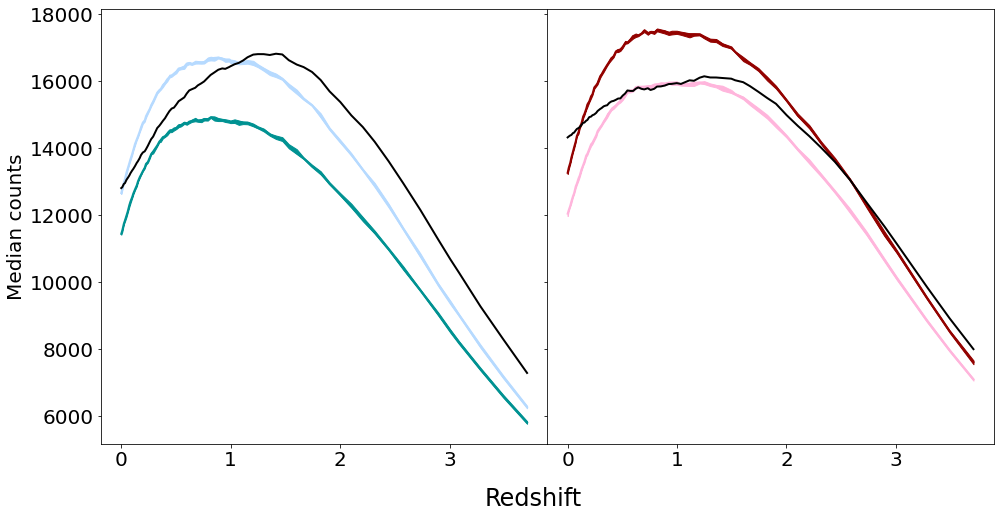

In [44]:
# plot of median counts for Illustris and TNG

fig,ax = plt.subplots(1,2,figsize=(16,8),sharey=True)
plt.subplots_adjust(wspace=0,hspace=0)

for phys in ["dark","hydro"]:

    sim = "Illustris"
    color = f"{sim} {phys}"
    
    ill = Illustris[phys]
    minus = np.array(ill['medians'])-np.array(ill['quartiles'])[:,0]
    plus = np.array(ill['quartiles'])[:,1] - np.array(ill['medians'])
    ax[0].plot(ill['z'],ill['medians'], color=palette[color], lw=2)
    ax[0].fill_between(ill['z'], np.array(ill['quartiles'])[:,0], np.array(ill['quartiles'])[:,1],color=palette[color],alpha=1)
    
    sim = "TNG"
    color = f"{sim} {phys}"
    
    tng = TNG[phys]
    minus = np.array(tng['medians'])-np.array(tng['quartiles'])[:,0]
    plus = np.array(tng['quartiles'])[:,1] - np.array(tng['medians'])
    
    
    ax[1].plot(tng['z'],tng['medians'], color=palette[color], lw=2)
    ax[1].fill_between(tng['z'], np.array(tng['quartiles'])[:,0], np.array(tng['quartiles'])[:,1],color=palette[color],alpha=1)

ax[0].plot(simstars['Illustris']['z'],simstars['Illustris']['prims'], color='black', lw=2)
ax[1].plot(simstars['TNG']['z'],simstars['TNG']['prims'], color='black', lw=2)

# plt.savefig(f"../plots/pairs_plots/{size}_{subset}_sepvsvel.pdf",bbox_inches='tight')
fig.supxlabel('Redshift')
ax[0].set_ylabel('Median counts')
plt.show()

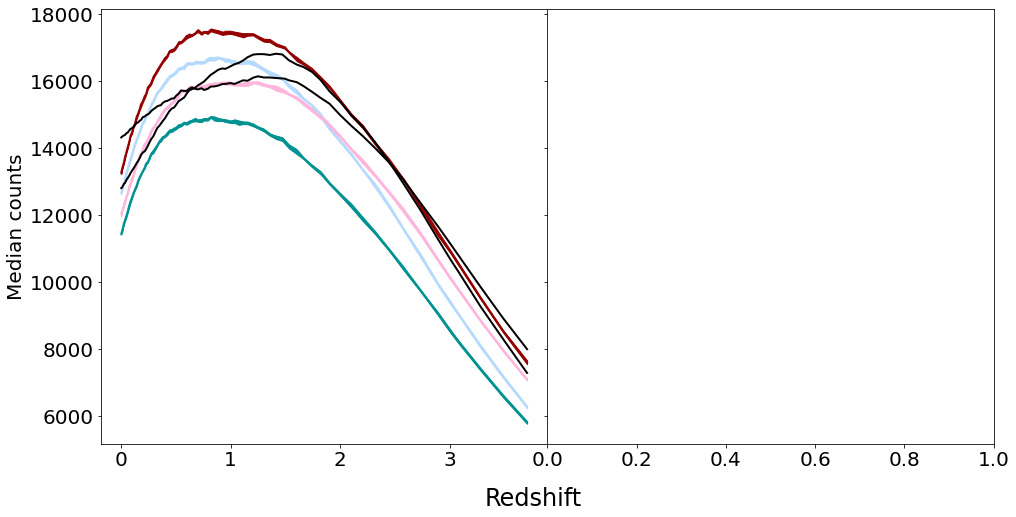

In [45]:
# plot of median counts for Illustris and TNG

fig,ax = plt.subplots(1,2,figsize=(16,8),sharey=True)
plt.subplots_adjust(wspace=0,hspace=0)

for phys in ["dark","hydro"]:

    sim = "Illustris"
    color = f"{sim} {phys}"
    
    ill = Illustris[phys]
    minus = np.array(ill['medians'])-np.array(ill['quartiles'])[:,0]
    plus = np.array(ill['quartiles'])[:,1] - np.array(ill['medians'])
    ax[0].plot(ill['z'],ill['medians'], color=palette[color], lw=2)
    ax[0].fill_between(ill['z'], np.array(ill['quartiles'])[:,0], np.array(ill['quartiles'])[:,1],color=palette[color],alpha=1)
    
    sim = "TNG"
    color = f"{sim} {phys}"
    
    tng = TNG[phys]
    minus = np.array(tng['medians'])-np.array(tng['quartiles'])[:,0]
    plus = np.array(tng['quartiles'])[:,1] - np.array(tng['medians'])
    
    
    ax[0].plot(tng['z'],tng['medians'], color=palette[color], lw=2)
    ax[0].fill_between(tng['z'], np.array(tng['quartiles'])[:,0], np.array(tng['quartiles'])[:,1],color=palette[color],alpha=1)

ax[0].plot(simstars['Illustris']['z'],simstars['Illustris']['prims'], color='black', lw=2)
ax[0].plot(simstars['TNG']['z'],simstars['TNG']['prims'], color='black', lw=2)

# plt.savefig(f"../plots/pairs_plots/{size}_{subset}_sepvsvel.pdf",bbox_inches='tight')
fig.supxlabel('Redshift')
ax[0].set_ylabel('Median counts')
plt.show()

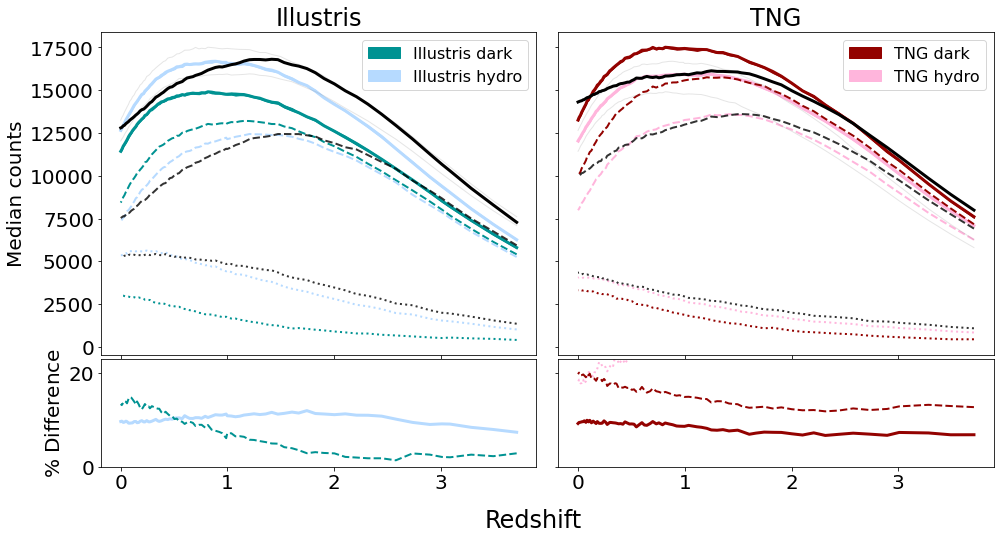

In [51]:
## plot of median counts and differences for illustris and tng
fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey='row', sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[3,1],'wspace': 0.05,"hspace":0.02})

axILL = ax[0][0]
axTNG = ax[0][1]
axilldiff = ax[1][0]
axtngdiff = ax[1][1]

illd, illh = Illustris['dark'], Illustris['hydro']
tngd, tngh = TNG['dark'], TNG['hydro']

########################
# Illustris plot first #
########################
axILL.set(title="Illustris", ylabel="Median counts")

axILL.plot(illd['z'],illd['medians'], color=palette["Illustris dark"], lw=3)
axILL.plot(illh['z'],illh['medians'], color=palette["Illustris hydro"], lw=3)

axILL.plot(illd['z'],illd['unpaired'], color=palette["Illustris dark"], lw=2, linestyle="dotted")
axILL.plot(illh['z'],illh['unpaired'], color=palette["Illustris hydro"], lw=2, linestyle="dotted")
axILL.plot(illd['z'],illd['paired'], color=palette["Illustris dark"], lw=2, linestyle="dashed")
axILL.plot(illh['z'],illh['paired'], color=palette["Illustris hydro"], lw=2, linestyle="dashed")

axILL.fill_between(illd['z'], np.array(illd['quartiles'])[:,0], np.array(illd['quartiles'])[:,1],color=palette["Illustris dark"],alpha=1, label="Illustris dark")
axILL.fill_between(illh['z'], np.array(illh['quartiles'])[:,0], np.array(illh['quartiles'])[:,1],color=palette["Illustris hydro"],alpha=1, label="Illustris hydro")

axILL.plot(tngd['z'],tngd['medians'], color='grey',alpha=0.2, lw=1)
axILL.plot(tngh['z'],tngh['medians'], color='grey',alpha=0.2, lw=1)

axILL.plot(simstars['Illustris']['z'],simstars['Illustris']['prims'], color='black', lw=3)
axILL.plot(simstars['Illustris']['z'],simstars['Illustris']['paired'], color='black',linestyle='dashed', lw=2,alpha=0.8)
axILL.plot(simstars['Illustris']['z'],simstars['Illustris']['unpaired'], color='black',linestyle='dotted', lw=2,alpha=0.8)


############
# TNG plot #
############
axTNG.set(title="TNG")
axTNG.plot(tngd['z'],tngd['medians'], color=palette["TNG dark"], lw=3)
axTNG.plot(tngh['z'],tngh['medians'], color=palette["TNG hydro"], lw=3)

axTNG.plot(tngd['z'],tngd['unpaired'], color=palette["TNG dark"], lw=2, linestyle="dotted")
axTNG.plot(tngh['z'],tngh['unpaired'], color=palette["TNG hydro"], lw=2, linestyle="dotted")
axTNG.plot(tngd['z'],tngd['paired'], color=palette["TNG dark"], lw=2, linestyle="dashed")
axTNG.plot(tngh['z'],tngh['paired'], color=palette["TNG hydro"], lw=2, linestyle="dashed")

axTNG.fill_between(tngd['z'], np.array(tngd['quartiles'])[:,0], np.array(tngd['quartiles'])[:,1],color=palette["TNG dark"],alpha=1, label="TNG dark")
axTNG.fill_between(tngh['z'], np.array(tngh['quartiles'])[:,0], np.array(tngh['quartiles'])[:,1],color=palette["TNG hydro"],alpha=1, label="TNG hydro")

axTNG.plot(illd['z'],illd['medians'], color='grey',alpha=0.2, lw=1)
axTNG.plot(illh['z'],illh['medians'], color='grey',alpha=0.2, lw=1)

axTNG.plot(simstars['TNG']['z'],simstars['TNG']['prims'], color='black', lw=3)
axTNG.plot(simstars['TNG']['z'],simstars['TNG']['paired'], color='black',linestyle='dashed', lw=2,alpha=0.8)
axTNG.plot(simstars['TNG']['z'],simstars['TNG']['unpaired'], color='black',linestyle='dotted', lw=2,alpha=0.8)


########################
# Illustris difference #
########################
axilldiff.set(ylabel=r"$\%$ Difference")
axilldiff.plot(illd['z'], 100*np.abs( np.array(illd['medians'])-np.array(illh['medians']) )/np.array(illh['medians']), color=palette["Illustris hydro"], lw=3)
axilldiff.plot(illd['z'], 100*np.abs( np.array(illd['unpaired'])-np.array(illh['unpaired']) )/np.array(illh['unpaired']), color=palette["Illustris hydro"], lw=2, linestyle='dotted')
axilldiff.plot(illd['z'], 100*np.abs( np.array(illd['paired'])-np.array(illh['paired']) )/np.array(illd['paired']), color=palette["Illustris dark"], lw=2, linestyle='dashed')


########################
# Illustris difference #
########################
axtngdiff.plot(tngd['z'], 100*np.abs( np.array(tngd['medians'])-np.array(tngh['medians']) )/np.array(tngd['medians']), color=palette["TNG dark"], lw=3)
axtngdiff.plot(tngd['z'], 100*np.abs( np.array(tngd['unpaired'])-np.array(tngh['unpaired']) )/np.array(tngh['unpaired']), color=palette["TNG hydro"], lw=2, linestyle='dotted')
axtngdiff.plot(tngd['z'], 100*np.abs( np.array(tngd['paired'])-np.array(tngh['paired']) )/np.array(tngd['paired']), color=palette["TNG dark"], lw=2, linestyle='dashed')
axtngdiff.set_ylim(0,23)

axILL.legend(loc="upper right",fontsize=16)
axTNG.legend(loc="upper right",fontsize=16)
fig.supxlabel("Redshift")
plt.savefig(f"../plots/pairs_plots/counts_dwarfs.png",bbox_inches='tight',facecolor="white")
plt.show()


### Massive

In [52]:
class EmptyFile(Exception): pass
class SkipRedshift(Exception): pass
errorprint = False
redshiftcutoff_Ill = 3.8 
redshiftcutoff_TNG = 4
# need to use different redshift cuts cause 54 dne, and 53+55 hydro dne

In [53]:
## Make Illustris massive median count dataset

Illustris = {}
for it_phys in ['dark','hydro']:
    Illustris[it_phys] = {}
    z = []
    meds = []
    quarts = []
    meds_unpaired = []
    meds_pairs = []
    for snapnum in np.arange(0,136):
        if snapnum ==113:
            continue
            
        try:
            pair_path = f"Illustris_{snapnum}_10.hdf5"
            pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
            realarray = np.unique(np.array(pair_data['pairs']['dark']['Realization']))
            
            if len(pair_data['pairs']['dark']['Group ID']) == 0:
                raise EmptyFile
                
            if pair_data['Header'].attrs['Redshift'] > redshiftcutoff_Ill:
                raise SkipRedshift
                        
            num_prims_per_real = []
            num_unpaired_per_real = []
            num_pairs_per_real = []
            for realization in realarray:
                # find num of unpaired prims:
                unpaired_stells = np.array(pair_data['unpaired'][it_phys]['Sub1 Stellar Mass'])
                unpaired_realization = np.array(pair_data['unpaired'][it_phys]['Realization'])

                mask_prims = (unpaired_stells > 0.5) & (unpaired_stells < 10)
                mask_real = unpaired_realization == realization

                num_unpairedprims = np.count_nonzero(mask_real & mask_prims)
                num_unpaired_per_real.append(num_unpairedprims)

                # find num of paired prims:
                paired_stells = np.array(pair_data['pairs'][it_phys]['Sub1 Stellar Mass'])
                paired_realization = np.array(pair_data['pairs'][it_phys]['Realization'])

                mask_prims = (paired_stells > 0.5) & (paired_stells < 10)
                mask_real = paired_realization == realization

                num_pairedprims = np.count_nonzero(mask_real & mask_prims)
                num_pairs_per_real.append(num_pairedprims)


                # find total number of primaries
                tot_numprims = num_unpairedprims + num_pairedprims
                num_prims_per_real.append(tot_numprims)

            z.append(pair_data['Header'].attrs['Redshift'])
            meds.append( np.median(num_prims_per_real) )
            quarts.append( np.percentile(num_prims_per_real,[16,84]) )
            meds_unpaired.append( np.median(num_unpaired_per_real) )
            meds_pairs.append( np.median(num_pairs_per_real) )
            
            pair_data.close()
        
        except KeyError:
            if errorprint: print(f'skipping {snapnum}')
            continue
            
        except EmptyFile:
            if errorprint: print(f"skipping {snapnum}, empty file")
            continue
            
        except SkipRedshift:
            if errorprint: print(f"skipping {snapnum}, redshift out of range")
            
    Illustris[it_phys] = {"z":z, "medians":meds, "quartiles":quarts, "unpaired":meds_unpaired, "paired": meds_pairs}
    print(f"{it_phys} complete")



dark complete
hydro complete


In [54]:
## Make TNG median count dataset

TNG = {}
for it_phys in ['dark','hydro']:
    TNG[it_phys] = {}
    z = []
    meds = []
    quarts = []
    meds_unpaired = []
    meds_pairs = []
    for snapnum in np.arange(0,100):
        if snapnum ==48:
            continue
        try:
            pair_path = f"TNG_{snapnum}_10.hdf5"
            pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
            realarray = np.unique(np.array(pair_data['pairs'][it_phys]['Realization']))
            
            if len(pair_data['pairs']['dark']['Group ID']) == 0:
                raise EmptyFile
                
            if pair_data['Header'].attrs['Redshift'] > redshiftcutoff_TNG:
                raise SkipRedshift
            
            num_prims_per_real = []
            num_unpaired_per_real = []
            num_pairs_per_real = []
            for realization in realarray:
                # find num of unpaired prims:
                unpaired_stells = np.array(pair_data['unpaired'][it_phys]['Sub1 Stellar Mass'])
                unpaired_realization = np.array(pair_data['unpaired'][it_phys]['Realization'])

                mask_prims = (unpaired_stells > 0.5) & (unpaired_stells < 10)
                mask_real = unpaired_realization == realization

                num_unpairedprims = np.count_nonzero(mask_real & mask_prims)
                num_unpaired_per_real.append(num_unpairedprims)

                # find num of paired prims:
                paired_stells = np.array(pair_data['pairs'][it_phys]['Sub1 Stellar Mass'])
                paired_realization = np.array(pair_data['pairs'][it_phys]['Realization'])

                mask_prims = (paired_stells > 0.5) & (paired_stells < 10)
                mask_real = paired_realization == realization

                num_pairedprims = np.count_nonzero(mask_real & mask_prims)
                num_pairs_per_real.append(num_pairedprims)

                # find total number of primaries
                tot_numprims = num_unpairedprims + num_pairedprims
                num_prims_per_real.append(tot_numprims)
                

            z.append(pair_data['Header'].attrs['Redshift'])
            meds.append( np.median(num_prims_per_real) )
            quarts.append( np.percentile(num_prims_per_real,[16,84]) )
            meds_unpaired.append( np.median(num_unpaired_per_real) )
            meds_pairs.append( np.median(num_pairs_per_real) )
            
            pair_data.close()

        
        except KeyError:
            if errorprint: print(f'skipping {snapnum}')
            continue
            
        except EmptyFile:
            if errorprint: print(f"skipping {snapnum}, empty file")
            continue
            
        except SkipRedshift:
            if errorprint: print(f"skipping {snapnum}, redshift out of range")
            
    TNG[it_phys] = {"z":z, "medians":meds, "quartiles":quarts, "unpaired":meds_unpaired, "paired": meds_pairs}
            
    print(f"{it_phys} complete")



dark complete
hydro complete


In [55]:
## Make simulation stellar cut counts

simstars = {}
phys = 'hydro'
errorprint=False

for it_sim in ['Illustris','TNG']:
    simstars[it_sim] = {}
    
    z = []
    prims = []
    unpaired = []
    paired = []
    
    if it_sim=="Illustris":
        snaprange = 136
    elif it_sim=="TNG":
        snaprange = 100

    for snapnum in range(snaprange):
        if (snapnum == 113) | (snapnum == 48):
            continue
            
        try:
            pair_path = f"{it_sim}_{snapnum}_10.hdf5"
            pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
            realarray = np.unique(np.array(pair_data['pairs']['hydro']['Realization']))
            
            if len(pair_data['pairs']['hydro']['Group ID']) == 0:
                raise EmptyFile
                
            if pair_data['Header'].attrs['Redshift'] > redshiftcutoff_Ill:
                raise SkipRedshift
                        
            num_prims = []
            num_unpaired = []
            num_pairs = []
            realization = -1

            unpaired_stells = np.array(pair_data['unpaired'][phys]['Sub1 MassType'])[:,4]
            unpaired_realization = np.array(pair_data['unpaired'][phys]['Realization'])

            mask_prims = (unpaired_stells > 0.5) & (unpaired_stells < 10)
            mask_real = unpaired_realization == realization

            num_unpairedprims = np.count_nonzero(mask_real & mask_prims)
            num_unpaired.append(num_unpairedprims)

            # find num of paired prims:
            paired_stells = np.array(pair_data['pairs'][it_phys]['Sub1 MassType'])[:,4]
            paired_realization = np.array(pair_data['pairs'][it_phys]['Realization'])

            mask_prims = (paired_stells > 0.5) & (paired_stells < 10)
            mask_real = paired_realization == realization

            num_pairedprims = np.count_nonzero(mask_real & mask_prims)
            num_pairs.append(num_pairedprims)

            # find total number of primaries
            tot_numprims = num_unpairedprims + num_pairedprims
            num_prims.append(tot_numprims)
                            
            z.append(pair_data['Header'].attrs['Redshift'])
            prims.append( num_prims )
            unpaired.append( num_unpaired )
            paired.append( num_pairs )
            
            pair_data.close()
        
        except KeyError:
            if errorprint: print(f'skipping {snapnum}')
            continue
            
        except EmptyFile:
            if errorprint: print(f"skipping {snapnum}, empty file")
            continue
            
        except SkipRedshift:
            if errorprint: print(f"skipping {snapnum}, redshift out of range")
            
    simstars[it_sim] = {"z":z, "prims":prims, "unpaired":unpaired, "paired": paired}
            
    print(f"{it_sim} complete")



Illustris complete
TNG complete


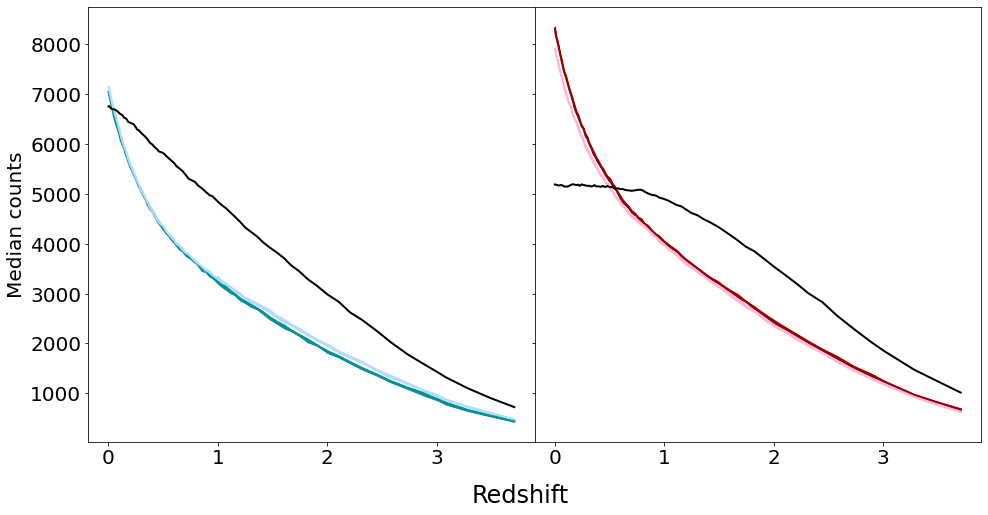

In [56]:
# plot of median counts for Illustris and TNG

fig,ax = plt.subplots(1,2,figsize=(16,8),sharey=True)
plt.subplots_adjust(wspace=0,hspace=0)

for phys in ["dark","hydro"]:

    sim = "Illustris"
    color = f"{sim} {phys}"
    
    ill = Illustris[phys]
    ax[0].plot(ill['z'],ill['medians'], color=palette[color], lw=2)
    ax[0].fill_between(ill['z'], np.array(ill['quartiles'])[:,0], np.array(ill['quartiles'])[:,1],color=palette[color],alpha=1)
    
    sim = "TNG"
    color = f"{sim} {phys}"
    
    tng = TNG[phys]
    ax[1].plot(tng['z'],tng['medians'], color=palette[color], lw=2)
    ax[1].fill_between(tng['z'], np.array(tng['quartiles'])[:,0], np.array(tng['quartiles'])[:,1],color=palette[color],alpha=1)
    
ax[0].plot(simstars['Illustris']['z'],simstars['Illustris']['prims'], color='black', lw=2)
ax[1].plot(simstars['TNG']['z'],simstars['TNG']['prims'], color='black', lw=2)

fig.supxlabel('Redshift')
ax[0].set_ylabel('Median counts')
plt.show()

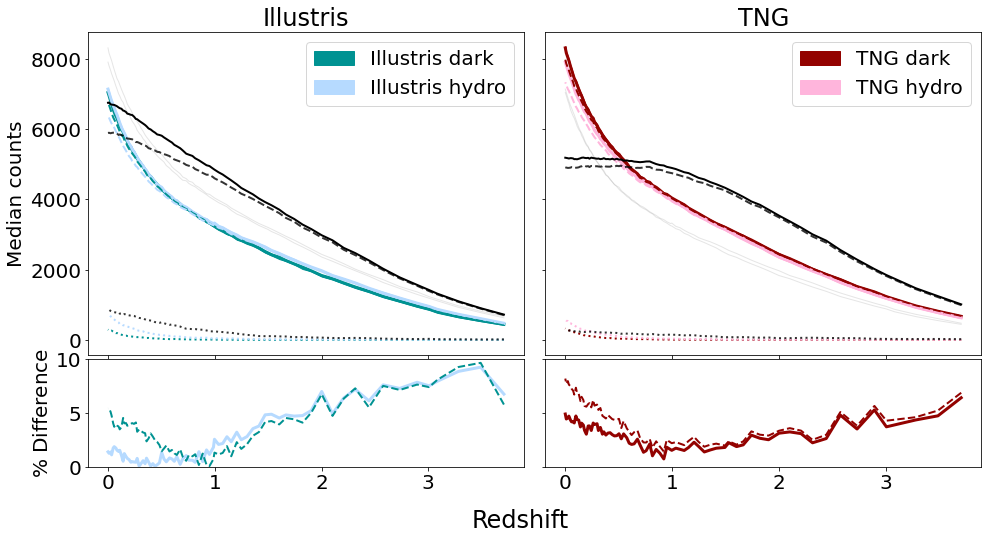

In [58]:
## plot of median counts and differences for illustris and tng
fig, ax = plt.subplots(2, 2, figsize=(16,8), sharey='row', sharex=True, gridspec_kw={'width_ratios': [1,1], 'height_ratios':[3,1],'wspace': 0.05,"hspace":0.02})

axILL = ax[0][0]
axTNG = ax[0][1]
axilldiff = ax[1][0]
axtngdiff = ax[1][1]

illd, illh = Illustris['dark'], Illustris['hydro']
tngd, tngh = TNG['dark'], TNG['hydro']

########################
# Illustris plot first #
########################
axILL.set(title="Illustris", ylabel="Median counts")

axILL.plot(illd['z'],illd['medians'], color=palette["Illustris dark"], lw=3)
axILL.plot(illh['z'],illh['medians'], color=palette["Illustris hydro"], lw=3)

axILL.plot(illd['z'],illd['unpaired'], color=palette["Illustris dark"], lw=2, linestyle="dotted")
axILL.plot(illh['z'],illh['unpaired'], color=palette["Illustris hydro"], lw=2, linestyle="dotted")
axILL.plot(illd['z'],illd['paired'], color=palette["Illustris dark"], lw=2, linestyle="dashed")
axILL.plot(illh['z'],illh['paired'], color=palette["Illustris hydro"], lw=2, linestyle="dashed")

axILL.fill_between(illd['z'], np.array(illd['quartiles'])[:,0], np.array(illd['quartiles'])[:,1],color=palette["Illustris dark"],alpha=1, label="Illustris dark")
axILL.fill_between(illh['z'], np.array(illh['quartiles'])[:,0], np.array(illh['quartiles'])[:,1],color=palette["Illustris hydro"],alpha=1, label="Illustris hydro")

axILL.plot(tngd['z'],tngd['medians'], color='grey',alpha=0.2, lw=1)
axILL.plot(tngh['z'],tngh['medians'], color='grey',alpha=0.2, lw=1)

axILL.plot(simstars['Illustris']['z'],simstars['Illustris']['prims'], color='black', lw=2)
axILL.plot(simstars['Illustris']['z'],simstars['Illustris']['paired'], color='black',linestyle='dashed', lw=2,alpha=0.8)
axILL.plot(simstars['Illustris']['z'],simstars['Illustris']['unpaired'], color='black',linestyle='dotted', lw=2,alpha=0.8)



############
# TNG plot #
############
axTNG.set(title="TNG")
axTNG.plot(tngd['z'],tngd['medians'], color=palette["TNG dark"], lw=3)
axTNG.plot(tngh['z'],tngh['medians'], color=palette["TNG hydro"], lw=3)

axTNG.plot(tngd['z'],tngd['unpaired'], color=palette["TNG dark"], lw=2, linestyle="dotted")
axTNG.plot(tngh['z'],tngh['unpaired'], color=palette["TNG hydro"], lw=2, linestyle="dotted")
axTNG.plot(tngd['z'],tngd['paired'], color=palette["TNG dark"], lw=2, linestyle="dashed")
axTNG.plot(tngh['z'],tngh['paired'], color=palette["TNG hydro"], lw=2, linestyle="dashed")

axTNG.fill_between(tngd['z'], np.array(tngd['quartiles'])[:,0], np.array(tngd['quartiles'])[:,1],color=palette["TNG dark"],alpha=1, label="TNG dark")
axTNG.fill_between(tngh['z'], np.array(tngh['quartiles'])[:,0], np.array(tngh['quartiles'])[:,1],color=palette["TNG hydro"],alpha=1, label="TNG hydro")

axTNG.plot(illd['z'],illd['medians'], color='grey',alpha=0.2, lw=1)
axTNG.plot(illh['z'],illh['medians'], color='grey',alpha=0.2, lw=1)

axTNG.plot(simstars['TNG']['z'],simstars['TNG']['prims'], color='black', lw=2)
axTNG.plot(simstars['TNG']['z'],simstars['TNG']['paired'], color='black',linestyle='dashed', lw=2,alpha=0.8)
axTNG.plot(simstars['TNG']['z'],simstars['TNG']['unpaired'], color='black',linestyle='dotted', lw=2,alpha=0.8)



########################
# Illustris difference #
########################
axilldiff.set(ylabel=r"$\%$ Difference")

axilldiff.plot(illd['z'], 100*np.abs( np.array(illd['medians'])-np.array(illh['medians']) )/illh['medians'], color=palette["Illustris hydro"], lw=3)
axilldiff.plot(illd['z'], 100*np.abs( np.array(illd['unpaired'])-np.array(illh['unpaired']) )/illh['unpaired'], color=palette["Illustris hydro"], lw=2, linestyle='dotted')
axilldiff.plot(illd['z'], 100*np.abs( np.array(illd['paired'])-np.array(illh['paired']) )/illd['paired'], color=palette["Illustris dark"], lw=2, linestyle='dashed')


##################
# TNG difference #
##################
axtngdiff.plot(tngd['z'], 100*(np.abs( np.array(tngd['medians'])-np.array(tngh['medians']) )/tngd['medians']), color=palette["TNG dark"], lw=3)
axtngdiff.plot(tngd['z'], 100*(np.abs( np.array(tngd['unpaired'])-np.array(tngh['unpaired']) )/tngh['unpaired']), color=palette["TNG hydro"], lw=2, linestyle='dotted')
axtngdiff.plot(tngd['z'], 100*(np.abs( np.array(tngd['paired'])-np.array(tngh['paired']) )/tngd['paired']), color=palette["TNG dark"], lw=2, linestyle='dashed')
axtngdiff.set_ylim(0,10)

axILL.legend(loc="upper right")
axTNG.legend(loc="upper right")
fig.supxlabel("Redshift")
plt.savefig(f"../plots/pairs_plots/counts_massive.png",bbox_inches='tight',facecolor="white")
plt.show()


# Distributions w full sample (No groupCut)


In [5]:
# # make functions to get data at the requested snapshot
# def get_primmask(primstells, size):
#     if size == "dwarf":
#         mask = (primstells > 0.01) & (primstells < 0.5)
#     elif size == "massive":
#         mask = (primstells > 0.5) & (primstells < 10)
        
#     return mask

# def get_primaries(sim, phys, size, z, key="Sub1 Mass"):
#     zloc = np.where( zs['z'] == z)[0]
    
#     if sim == "Illustris":
#         snapshot = zs['zill'][zloc][0]
#     elif sim == "TNG":
#         snapshot = zs['ztng'][zloc][0]      
        
#     pair_path = f"{sim}_{snapshot}_10.hdf5"
#     pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
    
#     # get data for unpaired halos first
#     unpaired = pair_data["unpaired"][phys]
#     unpaired_stells = np.array(unpaired["Sub1 Stellar Mass"])
#     unpaired_prims = get_primmask(unpaired_stells, size)
#     unpaired_key = np.array(unpaired[key])[unpaired_prims]

#     # get data for paired halos next
#     paired = pair_data["pairs"][phys]
#     paired_stells = np.array(paired["Sub1 Stellar Mass"])
#     paired_prims = get_primmask(paired_stells, size)
#     paired_key = np.array(paired[key])[paired_prims]

#     catkey = np.concatenate((unpaired_key,paired_key))

#     return catkey

# def get_primaries_simstell(sim, phys, size, z, key="Sub1 Mass"):
#     zloc = np.where( zs['z'] == z)[0]
    
#     if phys == "dark":
#         print("There are not stellar masses in the dark matter runs.")
#         raise
    
#     if sim == "Illustris":
#         snapshot = zs['zill'][zloc][0]
#     elif sim == "TNG":
#         snapshot = zs['ztng'][zloc][0]      
        
#     pair_path = f"{sim}_{snapshot}_10.hdf5"
#     pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
    
#     # get data for unpaired halos first
#     unpaired = pair_data["unpaired"][phys]
#     unpaired_stells = np.array(unpaired["Sub1 MassType"])[:,4]
#     unpaired_prims = get_primmask(unpaired_stells, size)
#     unpaired_medreal = np.array(unpaired['Realization']) == -1
#     unpaired_mask = unpaired_prims & unpaired_medreal
#     unpaired_key = np.array(unpaired[key])[unpaired_mask]

#     # get data for paired halos next
#     paired = pair_data["pairs"][phys]
#     paired_stells = np.array(paired["Sub1 MassType"])[:,4]
#     paired_prims = get_primmask(paired_stells, size)
#     paired_medreal = np.array(paired['Realization']) == -1
#     paired_mask = paired_prims & paired_medreal
#     paired_key = np.array(paired[key])[paired_mask]

#     catkey = np.concatenate((unpaired_key,paired_key))

#     return catkey


# def get_secondaries(sim, phys, size, z, key="Sub2 Mass"):
#     zloc = np.where( zs['z'] == z)[0]
    
#     if sim == "Illustris":
#         snapshot = zs['zill'][zloc][0]
#     elif sim == "TNG":
#         snapshot = zs['ztng'][zloc][0]      
        
#     pair_path = f"{sim}_{snapshot}_10.hdf5"
#     pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")

#     # find primaries that pass criteria
#     paired = pair_data["pairs"][phys]
#     paired_stells = np.array(paired["Sub1 Stellar Mass"])
#     paired_prims = get_primmask(paired_stells, size)
    
#     # get the data for those secondaries!
#     seco_key = np.array(paired[key])[paired_prims]

#     return seco_key

# def get_secondaries_simstell(sim, phys, size, z, key="Sub2 Mass"):
#     zloc = np.where( zs['z'] == z)[0]
    
#     if phys == "dark":
#         print("There are not stellar masses in the dark matter runs.")
#         raise
    
#     if sim == "Illustris":
#         snapshot = zs['zill'][zloc][0]
#     elif sim == "TNG":
#         snapshot = zs['ztng'][zloc][0]      
        
#     pair_path = f"{sim}_{snapshot}_10.hdf5"
#     pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
    
#     # get data for paired halos next
#     paired = pair_data["pairs"][phys]
#     paired_stells = np.array(paired["Sub1 MassType"])[:,4]
#     paired_prims = get_primmask(paired_stells, size)
#     paired_medreal = np.array(paired['Realization']) == -1
#     paired_mask = paired_prims & paired_medreal
    
#     seco_key = np.array(paired[key])[paired_mask]

#     return seco_key

---
## Subhalo Mass

$\quad$
$\quad$
$\quad$

### Dwarfs

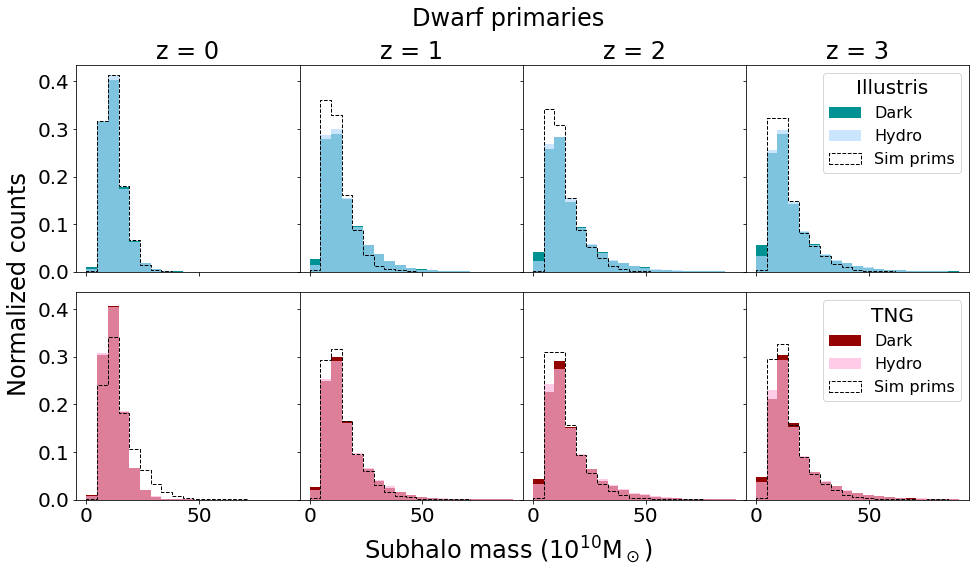

In [72]:
# primary linear - 

fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.linspace(0,90,20)

for i in range(4):
    masses = get_primaries("Illustris","dark","dwarf",i, "Sub1 Mass")
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("Illustris","hydro","dwarf",i, "Sub1 Mass")
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_primaries_simstell("Illustris","hydro","dwarf",i, "Sub1 Mass")
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[0][i].set_title(f"z = {i}")

    
    masses = get_primaries("TNG","dark","dwarf",i, "Sub1 Mass")
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("TNG","hydro","dwarf",i, "Sub1 Mass")
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_primaries_simstell("TNG","hydro","dwarf",i, "Sub1 Mass")
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

fig.suptitle("Dwarf primaries")
fig.supxlabel(r"Subhalo mass ($10^{10}\rm M_\odot$)")
fig.supylabel("Normalized counts",x=0.065)
plt.savefig(f"../plots/pairs_plots/distributions_mass_dwarf.png",bbox_inches='tight',facecolor="white")
plt.show()

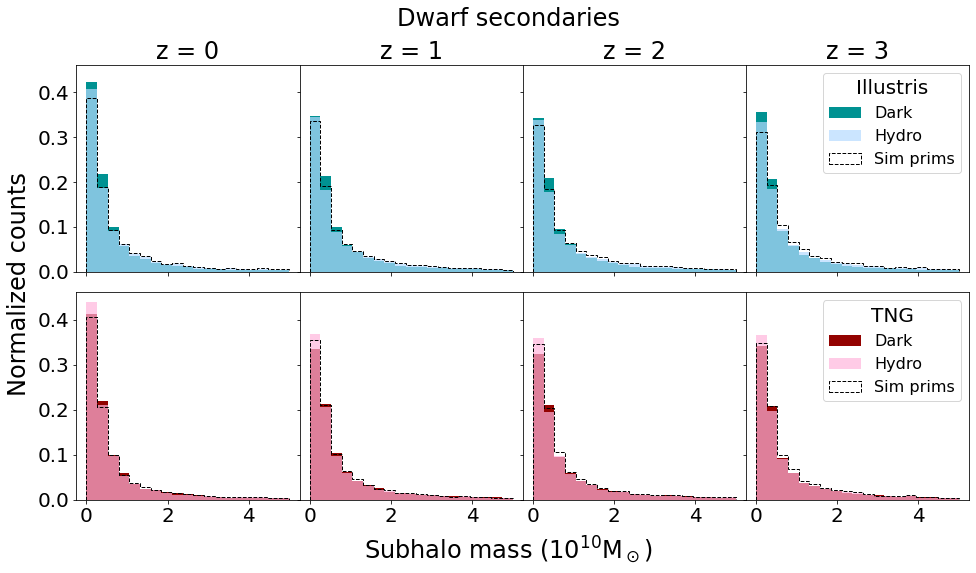

In [73]:
# secondary linear - 

fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.linspace(0,5,20)

for i in range(4):
    masses = get_secondaries("Illustris","dark","dwarf",i, "Sub2 Mass")
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("Illustris","hydro","dwarf",i, "Sub2 Mass")
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_secondaries_simstell("Illustris","hydro","dwarf",i, "Sub2 Mass")
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[0][i].set_title(f"z = {i}")

    
    masses = get_secondaries("TNG","dark","dwarf",i, "Sub2 Mass")
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("TNG","hydro","dwarf",i, "Sub2 Mass")
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_secondaries_simstell("TNG","hydro","dwarf",i, "Sub2 Mass")
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

fig.suptitle("Dwarf secondaries")
fig.supxlabel(r"Subhalo mass ($10^{10}\rm M_\odot$)")
fig.supylabel("Normalized counts",x=0.065)
plt.savefig(f"../plots/pairs_plots/distributions_mass_seco_dwarf.png",bbox_inches='tight',facecolor="white")
plt.show()

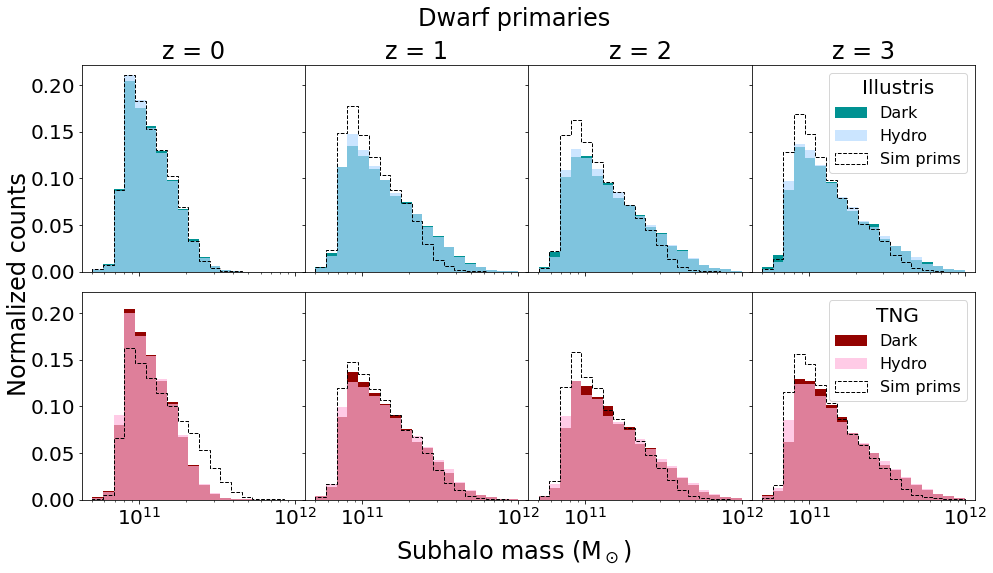

In [25]:
# primary log
fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(10.7,12,20)

for i in range(4):
    masses = get_primaries("Illustris","dark","dwarf",i, "Sub1 Mass")*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("Illustris","hydro","dwarf",i, "Sub1 Mass")*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_primaries_simstell("Illustris","hydro","dwarf",i, "Sub1 Mass")*1e10
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')

    
    masses = get_primaries("TNG","dark","dwarf",i, "Sub1 Mass")*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("TNG","hydro","dwarf",i, "Sub1 Mass")*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_primaries_simstell("TNG","hydro","dwarf",i, "Sub1 Mass")*1e10
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

fig.suptitle("Dwarf primaries")
fig.supxlabel(r"Subhalo mass ($\rm M_\odot$)")
fig.supylabel("Normalized counts",x=0.060)
plt.savefig(f"../plots/pairs_plots/distributions_mass_dwarf_log.png",bbox_inches='tight',facecolor="white")
plt.show()

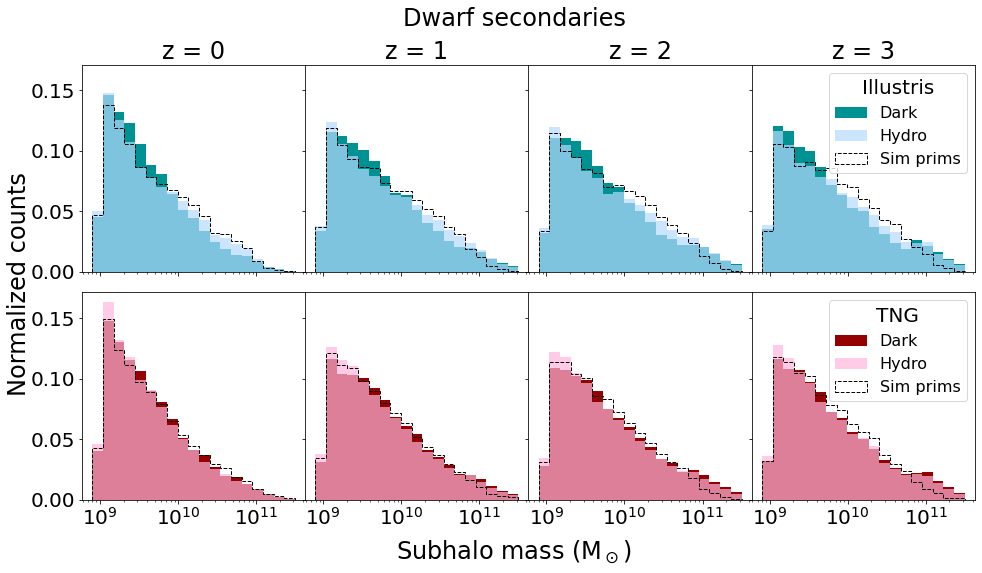

In [26]:
# secondary linear - 
fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(8.9,11.5,20)

for i in range(4):
    masses = get_secondaries("Illustris","dark","dwarf",i, "Sub2 Mass")*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("Illustris","hydro","dwarf",i, "Sub2 Mass")*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_secondaries_simstell("Illustris","hydro","dwarf",i, "Sub2 Mass")*1e10
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')

    
    masses = get_secondaries("TNG","dark","dwarf",i, "Sub2 Mass")*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("TNG","hydro","dwarf",i, "Sub2 Mass")*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_secondaries_simstell("TNG","hydro","dwarf",i, "Sub2 Mass")*1e10
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

fig.suptitle("Dwarf secondaries")
fig.supxlabel(r"Subhalo mass ($\rm M_\odot$)")
fig.supylabel("Normalized counts",x=0.060)
plt.savefig(f"../plots/pairs_plots/distributions_mass_seco_dwarf_log.png",bbox_inches='tight',facecolor="white")
plt.show()

### Massive

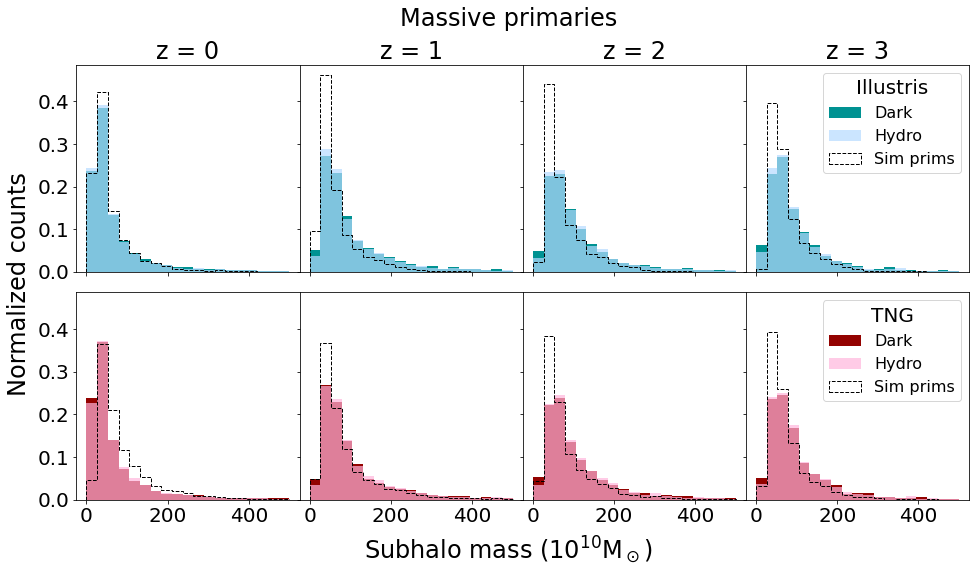

In [27]:
# primary lin
fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.linspace(0,500,20)

key = "Sub1 Mass"

for i in range(4):
    masses = get_primaries("Illustris","dark","massive",i, key)
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("Illustris","hydro","massive",i, key)
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_primaries_simstell("Illustris","hydro","massive",i, "Sub1 Mass")
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    ax[0][i].set_title(f"z = {i}")

    
    masses = get_primaries("TNG","dark","massive",i, key)
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("TNG","hydro","massive",i, key)
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_primaries_simstell("TNG","hydro","massive",i, "Sub1 Mass")
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

fig.suptitle("Massive primaries")
fig.supxlabel(r"Subhalo mass ($10^{10}\rm M_\odot$)")
fig.supylabel("Normalized counts",x=0.065)
# plt.savefig(f"../plots/pairs_plots/distributions_mass_massive.png",bbox_inches='tight',facecolor="white")
plt.show()

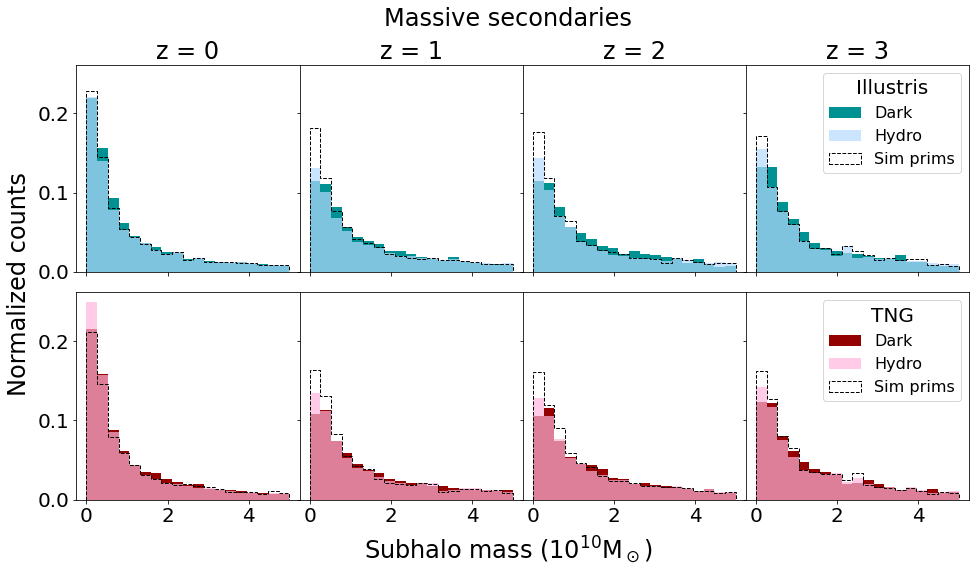

In [28]:
# secondary lin
fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.linspace(0,5,20)

for i in range(4):
    masses = get_secondaries("Illustris","dark","massive",i, "Sub2 Mass")
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("Illustris","hydro","massive",i, "Sub2 Mass")
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_secondaries_simstell("Illustris","hydro","massive",i, "Sub2 Mass")
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[0][i].set_title(f"z = {i}")

    
    masses = get_secondaries("TNG","dark","massive",i, "Sub2 Mass")
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("TNG","hydro","massive",i, "Sub2 Mass")
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_secondaries_simstell("TNG","hydro","massive",i, "Sub2 Mass")
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

fig.suptitle("Massive secondaries")
fig.supxlabel(r"Subhalo mass ($10^{10}\rm M_\odot$)")
fig.supylabel("Normalized counts",x=0.065)
plt.savefig(f"../plots/pairs_plots/distributions_mass_seco_massive.png",bbox_inches='tight',facecolor="white")
plt.show()

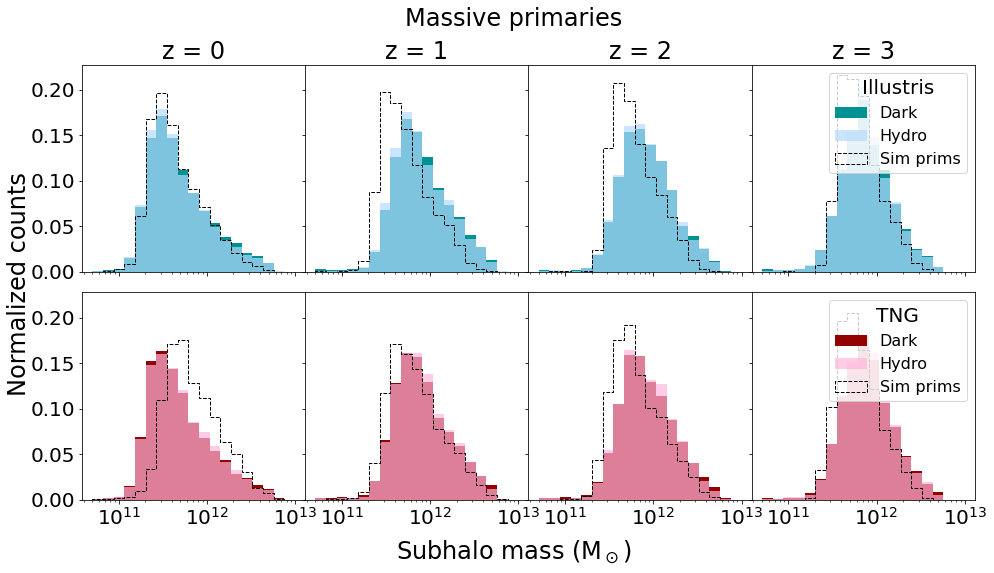

In [29]:
# primary log
fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(10.7,13,20)

key = "Sub1 Mass"

for i in range(4):
    masses = get_primaries("Illustris","dark","massive",i, key)*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("Illustris","hydro","massive",i, key)*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_primaries_simstell("Illustris","hydro","massive",i, "Sub1 Mass")*1e10
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')

    
    masses = get_primaries("TNG","dark","massive",i, key)*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("TNG","hydro","massive",i, key)*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_primaries_simstell("TNG","hydro","massive",i, "Sub1 Mass")*1e10
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

fig.suptitle("Massive primaries")
fig.supxlabel(r"Subhalo mass ($\rm M_\odot$)")
fig.supylabel("Normalized counts",x=0.060)
plt.savefig(f"../plots/pairs_plots/distributions_mass_massive_log.png",bbox_inches='tight',facecolor="white")
plt.show()

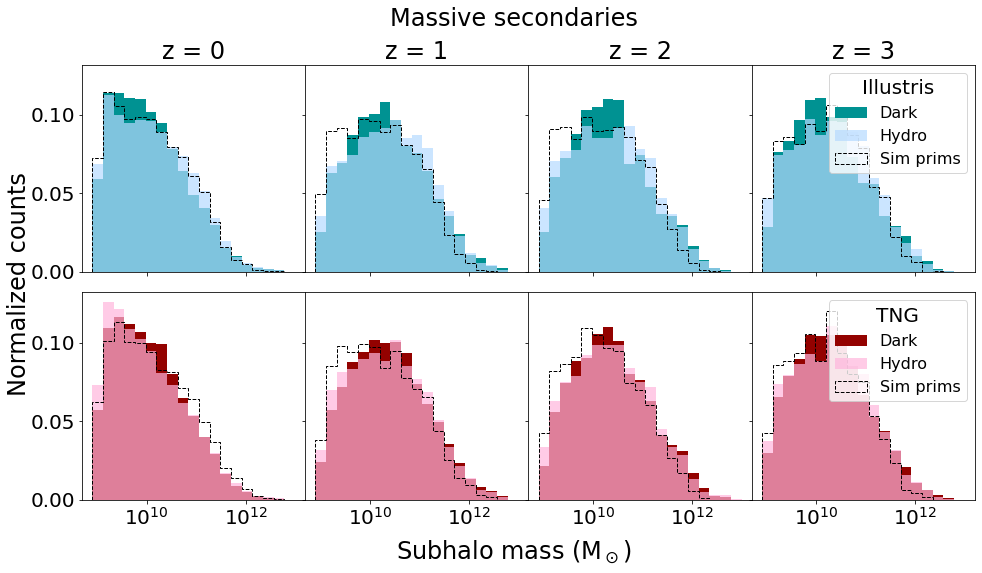

In [30]:
# secondary log
fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(8.9,13,20)

for i in range(4):
    masses = get_secondaries("Illustris","dark","massive",i, "Sub2 Mass")*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("Illustris","hydro","massive",i, "Sub2 Mass")*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_secondaries_simstell("Illustris","hydro","massive",i, "Sub2 Mass")*1e10
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')
    
    masses = get_secondaries("TNG","dark","massive",i, "Sub2 Mass")*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("TNG","hydro","massive",i, "Sub2 Mass")*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_secondaries_simstell("TNG","hydro","massive",i, "Sub2 Mass")*1e10
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

fig.suptitle("Massive secondaries")
fig.supxlabel(r"Subhalo mass ($\rm M_\odot$)")
fig.supylabel("Normalized counts",x=0.060)
plt.savefig(f"../plots/pairs_plots/distributions_mass_seco_massive_log.png",bbox_inches='tight',facecolor="white")
plt.show()

## Stellar mass


### Dwarfs

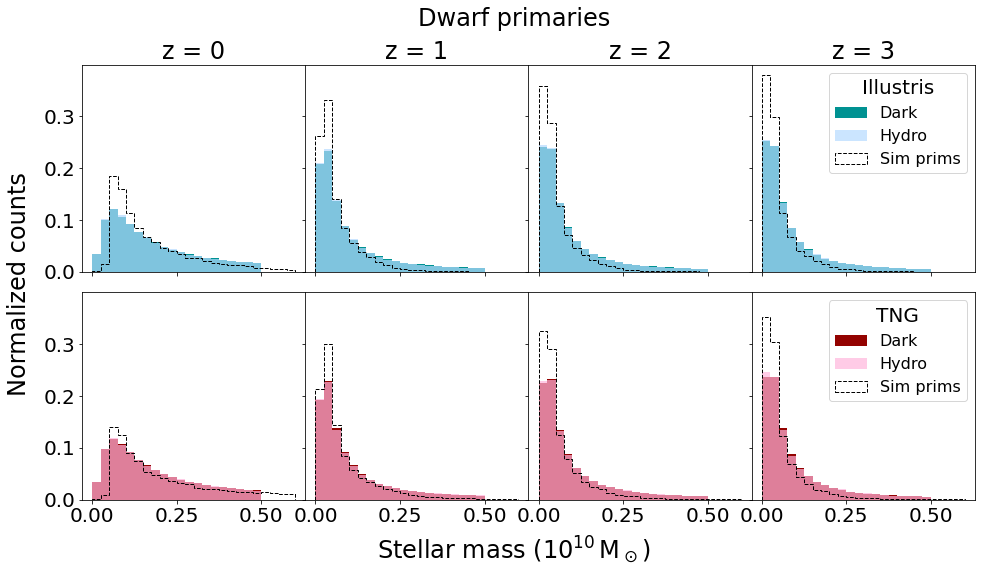

In [74]:
# primary lin

# Make dists for massive primary masses

fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.linspace(0.0001,0.6,25)

key = "Sub1 Stellar Mass"

for i in range(4):
    masses = get_primaries("Illustris","dark","dwarf",i, key)
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("Illustris","hydro","dwarf",i, key)
    massweights_h = np.ones(len(masses_h))/len(masses_h)
      
    masses_sim = get_primaries_simstell("Illustris","hydro","dwarf",i, key)
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[0][i].set_title(f"z = {i}")
#     ax[0][i].set_xticks(np.arange(0,0.7,0.2))

    
    masses = get_primaries("TNG","dark","dwarf",i, key)
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("TNG","hydro","dwarf",i, key)
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_primaries_simstell("TNG","hydro","dwarf",i, key)
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

fig.suptitle("Dwarf primaries")
fig.supxlabel(r"Stellar mass ($10^{10}\rm \, M_\odot$)")
fig.supylabel("Normalized counts",x=0.060)
plt.savefig(f"../plots/pairs_plots/distributions_stellarmass_dwarf.png",bbox_inches='tight',facecolor="white")
plt.show()

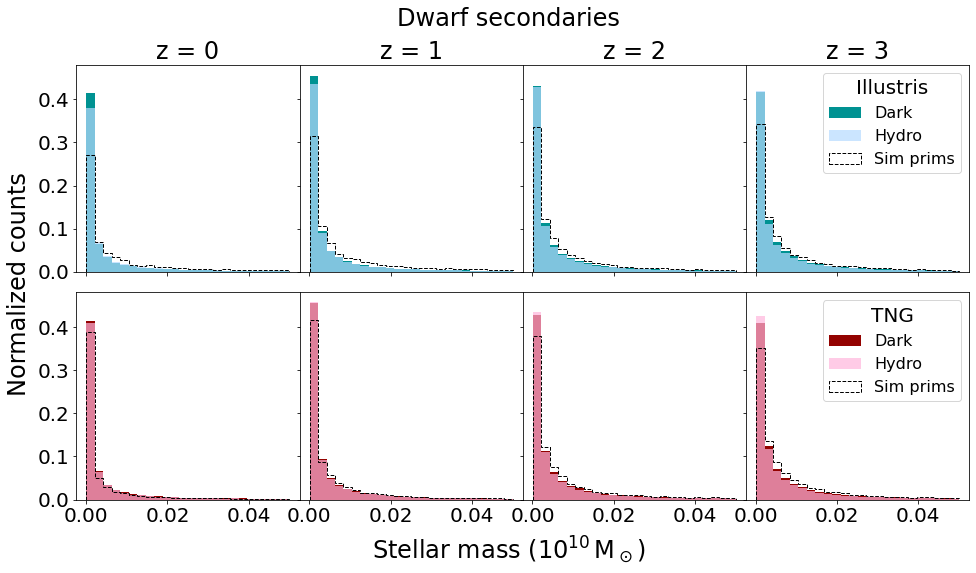

In [32]:
# secondary lin
fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.linspace(0.0001,0.05,25)

key = "Sub2 Stellar Mass"

for i in range(4):
    masses = get_secondaries("Illustris","dark","dwarf",i, key)
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("Illustris","hydro","dwarf",i, key)
    massweights_h = np.ones(len(masses_h))/len(masses_h)
      
    masses_sim = get_secondaries_simstell("Illustris","hydro","dwarf",i, "Sub2 MassType")[:,4]
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[0][i].set_title(f"z = {i}")
#     ax[0][i].set_xticks(np.arange(0,0.7,0.2))

    
    masses = get_secondaries("TNG","dark","dwarf",i, key)
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("TNG","hydro","dwarf",i, key)
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_secondaries_simstell("TNG","hydro","dwarf",i, "Sub2 MassType")[:,4]
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

fig.suptitle("Dwarf secondaries")
fig.supxlabel(r"Stellar mass ($10^{10} \rm \,M_\odot$)")
fig.supylabel("Normalized counts",x=0.065)
plt.savefig(f"../plots/pairs_plots/distributions_stellarmass_seco_dwarf.png",bbox_inches='tight',facecolor="white")
plt.show()

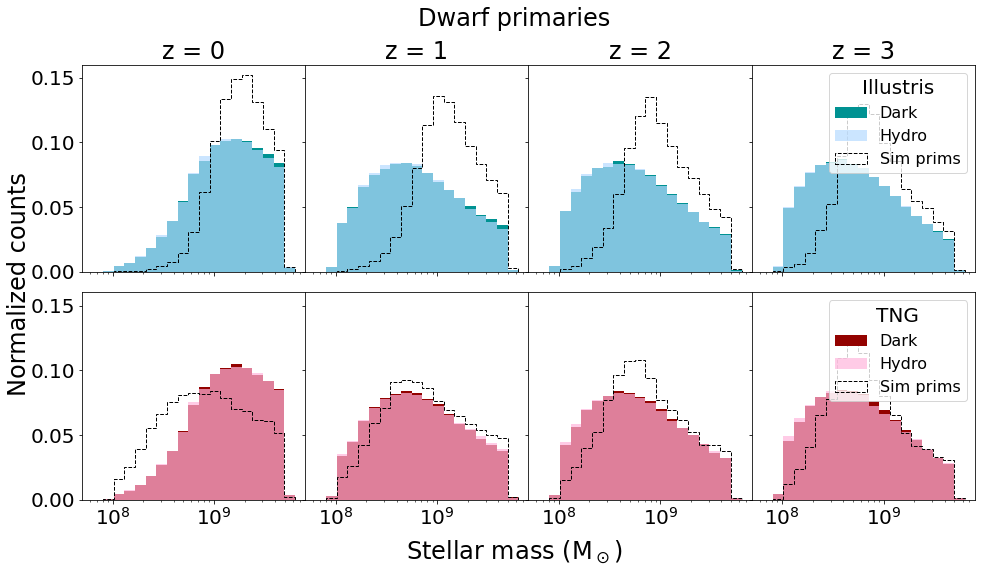

In [33]:
# primary log

fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(7.8,9.8,20)

key = "Sub1 Stellar Mass"

for i in range(4):
    masses = get_primaries("Illustris","dark","dwarf",i, key)*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("Illustris","hydro","dwarf",i, key)*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
      
    masses_sim = get_primaries_simstell("Illustris","hydro","dwarf",i, "Sub1 MassType")[:,4]*1e10
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')

    
    masses = get_primaries("TNG","dark","dwarf",i, key)*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("TNG","hydro","dwarf",i, key)*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_primaries_simstell("TNG","hydro","dwarf",i, "Sub1 MassType")[:,4]*1e10
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[1][i].set_xscale('log')

ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

fig.suptitle("Dwarf primaries")
fig.supxlabel(r"Stellar mass ($\rm M_\odot$)")
fig.supylabel("Normalized counts",x=0.060)
plt.savefig(f"../plots/pairs_plots/distributions_stellarmass_dwarf_log.png",bbox_inches='tight',facecolor="white")
plt.show()

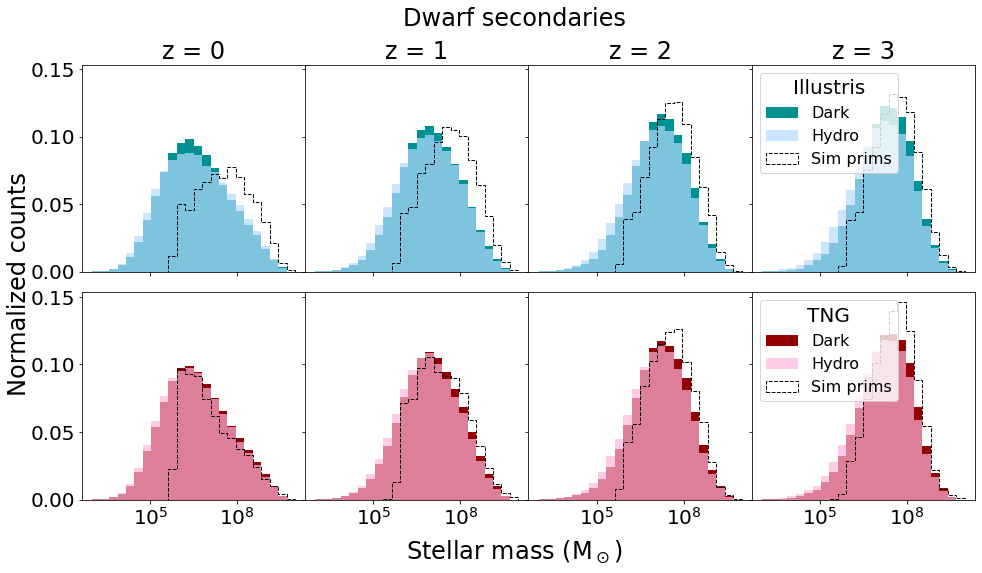

In [34]:
# secondary log
fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(3,10,25)

key = "Sub2 Stellar Mass"

for i in range(4):
    masses = get_secondaries("Illustris","dark","dwarf",i, key)*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("Illustris","hydro","dwarf",i, key)*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
      
    masses_sim = get_secondaries_simstell("Illustris","hydro","dwarf",i, "Sub2 MassType")[:,4]*1e10
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')
#     ax[0][i].set_xticks(np.arange(0,0.7,0.2))

    
    masses = get_secondaries("TNG","dark","dwarf",i, key)*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("TNG","hydro","dwarf",i, key)*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_secondaries_simstell("TNG","hydro","dwarf",i, "Sub2 MassType")[:,4]*1e10
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[1][i].set_xscale('log')

ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

fig.suptitle("Dwarf secondaries")
fig.supxlabel(r"Stellar mass ($\rm M_\odot$)")
fig.supylabel("Normalized counts",x=0.06)
plt.savefig(f"../plots/pairs_plots/distributions_stellarmass_seco_dwarf_log.png",bbox_inches='tight',facecolor="white")
plt.show()

### Massive

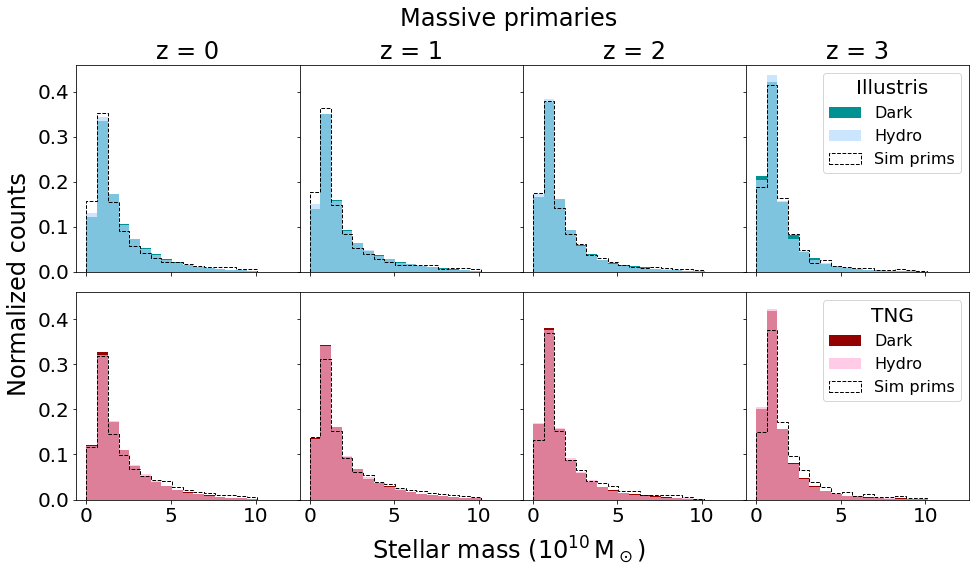

In [35]:
# primary lin

fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.linspace(0,12,20)

key = "Sub1 Stellar Mass"

for i in range(4):
    masses = get_primaries("Illustris","dark","massive",i, key)
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("Illustris","hydro","massive",i, key)
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_primaries_simstell("Illustris","hydro","massive",i, "Sub1 MassType")[:,4]
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[0][i].set_title(f"z = {i}")

    
    masses = get_primaries("TNG","dark","massive",i, key)
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("TNG","hydro","massive",i, key)
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_primaries_simstell("TNG","hydro","massive",i, "Sub1 MassType")[:,4]
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')


ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

# fig.text(0.14,0.82,"Massive primaries")

fig.suptitle("Massive primaries")
fig.supxlabel(r"Stellar mass ($10^{10}\rm \, M_\odot$)")
fig.supylabel("Normalized counts",x=0.065)
# plt.savefig(f"../plots/pairs_plots/distributions_stellarmass_massive.png",bbox_inches='tight',facecolor="white")
plt.show()

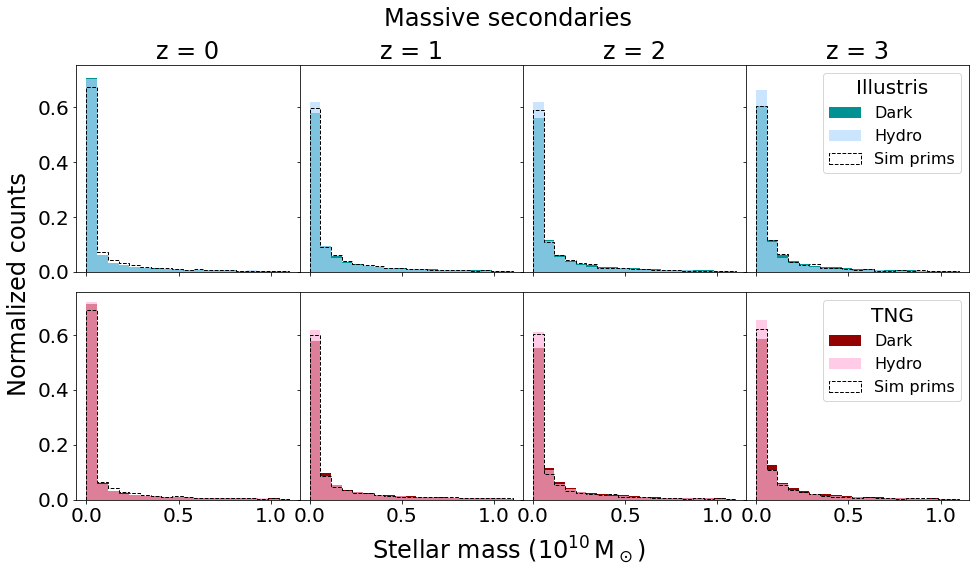

In [36]:
# secondary lin

fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.linspace(0,1.1,20)

key = "Sub2 Stellar Mass"

for i in range(4):
    masses = get_secondaries("Illustris","dark","massive",i, key)
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("Illustris","hydro","massive",i, key)
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_secondaries_simstell("Illustris","hydro","massive",i, "Sub2 MassType")[:,4]
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[0][i].set_title(f"z = {i}")

    
    masses = get_secondaries("TNG","dark","massive",i, key)
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("TNG","hydro","massive",i, key)
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_secondaries_simstell("TNG","hydro","massive",i, "Sub2 MassType")[:,4]
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')


ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

# fig.text(0.14,0.82,"Massive secondaries")

fig.suptitle("Massive secondaries")
fig.supxlabel(r"Stellar mass ($10^{10}\rm \, M_\odot$)")
fig.supylabel("Normalized counts",x=0.065)
plt.savefig(f"../plots/pairs_plots/distributions_stellarmass_seco_massive.png",bbox_inches='tight',facecolor="white")
plt.show()

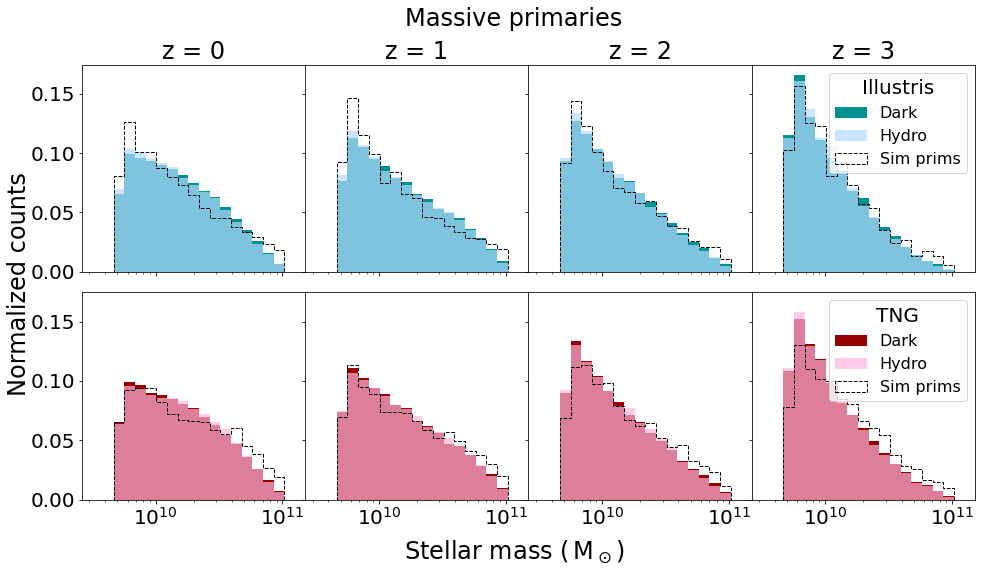

In [37]:
# primary log

fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(9.5,11.1,20)

key = "Sub1 Stellar Mass"

for i in range(4):
    masses = get_primaries("Illustris","dark","massive",i, key)*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("Illustris","hydro","massive",i, key)*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim2 = get_primaries_simstell("Illustris","hydro","massive",i, "Sub1 MassType")[:,4]*1e10
    massweights_sim2 = np.ones(len(masses_sim2))/len(masses_sim2)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim2, weights=massweights_sim2, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')
    
    masses = get_primaries("TNG","dark","massive",i, key)*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("TNG","hydro","massive",i, key)*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim2 = get_primaries_simstell("TNG","hydro","massive",i, "Sub1 MassType")[:,4]*1e10
    massweights_sim2 = np.ones(len(masses_sim2))/len(masses_sim2)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim2, weights=massweights_sim2, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')


ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

fig.suptitle("Massive primaries")
fig.supxlabel(r"Stellar mass ($\rm \, M_\odot$)")
fig.supylabel("Normalized counts",x=0.06)
plt.savefig(f"../plots/pairs_plots/distributions_stellarmass_massive_log.png",bbox_inches='tight',facecolor="white")
plt.show()

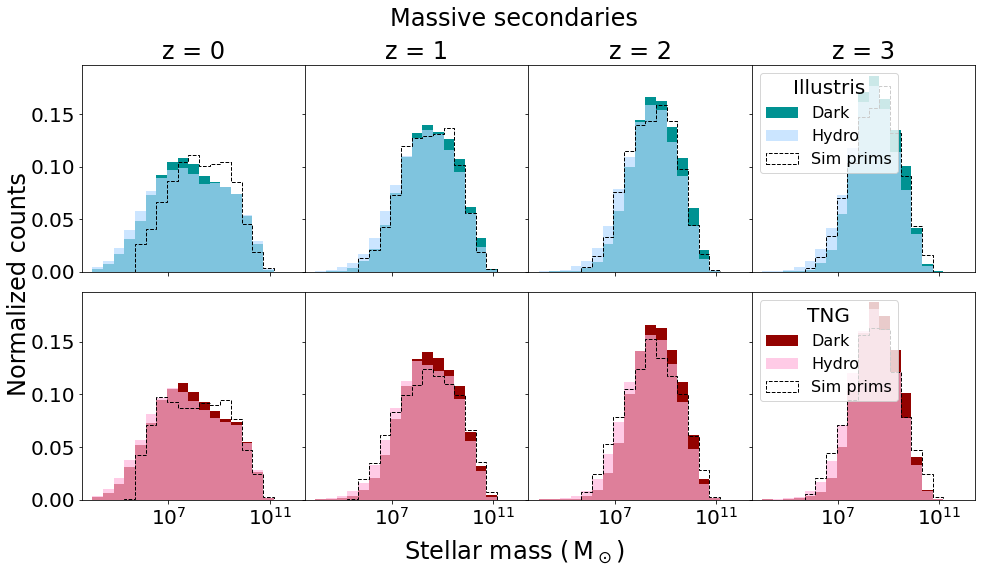

In [38]:
# secondary log
fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(4,12,20)

key = "Sub2 Stellar Mass"

for i in range(4):
    masses = get_secondaries("Illustris","dark","massive",i, key)*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("Illustris","hydro","massive",i, key)*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim2 = get_secondaries_simstell("Illustris","hydro","massive",i, "Sub2 MassType")[:,4]*1e10
    massweights_sim2 = np.ones(len(masses_sim2))/len(masses_sim2)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim2, weights=massweights_sim2, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')
    
    masses = get_secondaries("TNG","dark","massive",i, key)*1e10
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_secondaries("TNG","hydro","massive",i, key)*1e10
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim2 = get_secondaries_simstell("TNG","hydro","massive",i, "Sub2 MassType")[:,4]*1e10
    massweights_sim2 = np.ones(len(masses_sim2))/len(masses_sim2)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim2, weights=massweights_sim2, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')


ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

fig.suptitle("Massive secondaries")
fig.supxlabel(r"Stellar mass ($\rm \, M_\odot$)")
fig.supylabel("Normalized counts",x=0.06)
plt.savefig(f"../plots/pairs_plots/distributions_stellarmass_seco_massive_log.png",bbox_inches='tight',facecolor="white")
plt.show()

# Distributions with median and simulation stellar mass

get_primaries(sim, phys, size, z, key="Sub1 Mass", groupCut=False, median=False) 

get_primaries_simstell(sim, size, z, key="Sub1 Mass", groupCut=False)


## Subhalo Mass
### Dwarfs

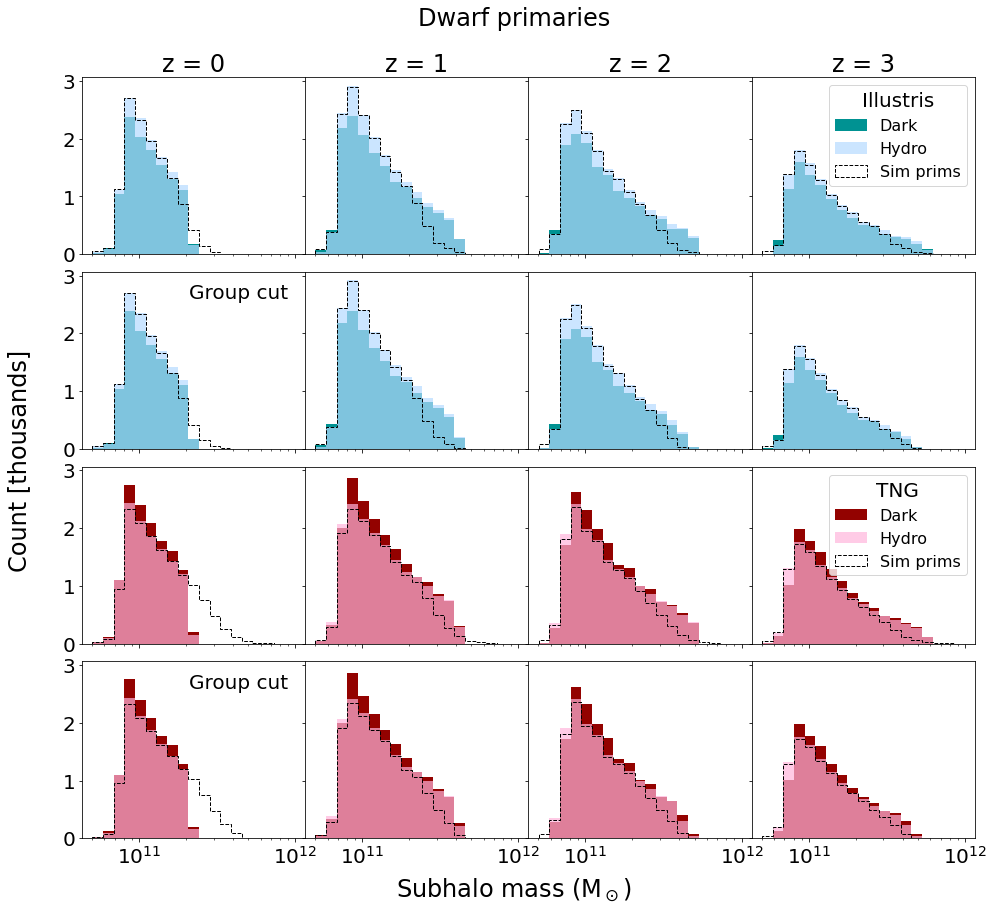

In [175]:
# primary log
fig, ax = plt.subplots(4,4,figsize=(16,14),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(10.7,12,20)
weight = 1000
key = "Sub1 Mass"
size = "dwarf"

for i in range(4):
    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')

    masses = get_primaries("Illustris","dark", size, i, key, median=True)*1e10

    masses_h = get_primaries("Illustris","hydro", size, i, key, median=True)*1e10
    
    masses_sim = get_primaries_simstell("Illustris", size, i, key)*1e10
    
    ax[0][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    masses = get_primaries("Illustris","dark", size, i, key, median=True,groupCut=True)*1e10

    masses_h = get_primaries("Illustris","hydro", size, i, key, median=True,groupCut=True)*1e10
    
    masses_sim = get_primaries_simstell("Illustris", size, i, key,groupCut=True)*1e10
    
    ax[1][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    
    masses = get_primaries("TNG","dark", size, i, key, median=True)*1e10
    
    masses_h = get_primaries("TNG","hydro", size, i, key, median=True)*1e10

    masses_sim = get_primaries_simstell("TNG",  size, i, key)*1e10
    
    ax[2][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[2][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[2][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    
    masses = get_primaries("TNG","dark", size, i, key, median=True,groupCut=True)*1e10
    
    masses_h = get_primaries("TNG","hydro", size, i, key, median=True,groupCut=True)*1e10

    masses_sim = get_primaries_simstell("TNG",  size, i, key,groupCut=True)*1e10
    
    ax[3][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[3][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[3][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')


ax[0][3].legend(title="Illustris",fontsize=16)
ax[2][3].legend(title="TNG",fontsize=16)
ax[1][0].text(9e11,2.6,"Group cut",ha="right")
ax[3][0].text(9e11,2.6,"Group cut",ha="right")

fig.suptitle("Dwarf primaries",y=0.95)
fig.supxlabel(r"Subhalo mass ($\rm M_\odot$)",y=0.06)
fig.supylabel("Count [thousands]",x=0.060)

plt.savefig(f"../plots/pairs_plots/dist_Mh_med_d1.png",bbox_inches='tight',facecolor="white")
plt.show()

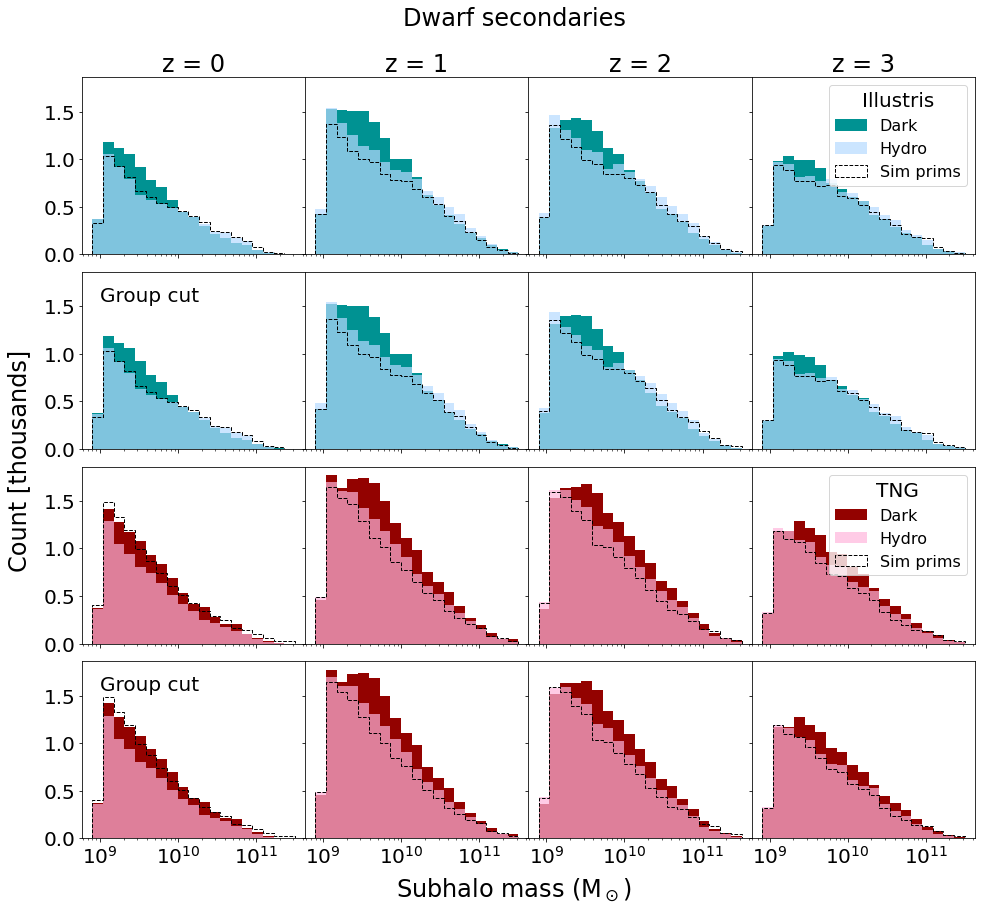

In [176]:
# secondary log
fig, ax = plt.subplots(4,4,figsize=(16,14),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(8.9,11.5,20)
weight = 1000
key = "Sub2 Mass"
size = "dwarf"

for i in range(4):
    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')

    masses = get_secondaries("Illustris","dark", size, i, key, median=True)*1e10
    masses_h = get_secondaries("Illustris","hydro", size, i, key, median=True)*1e10    
    masses_sim = get_secondaries_simstell("Illustris", size, i, key)*1e10
    
    ax[0][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    
    masses = get_secondaries("Illustris","dark", size, i, key, median=True,groupCut=True)*1e10
    masses_h = get_secondaries("Illustris","hydro", size, i, key, median=True,groupCut=True)*1e10
    masses_sim = get_secondaries_simstell("Illustris", size, i, key,groupCut=True)*1e10
    
    ax[1][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    
    masses = get_secondaries("TNG","dark", size, i, key, median=True)*1e10
    masses_h = get_secondaries("TNG","hydro", size, i, key, median=True)*1e10
    masses_sim = get_secondaries_simstell("TNG",  size, i, key)*1e10
    
    ax[2][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[2][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[2][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    

    masses = get_secondaries("TNG","dark", size, i, key, median=True,groupCut=True)*1e10
    masses_h = get_secondaries("TNG","hydro", size, i, key, median=True,groupCut=True)*1e10
    masses_sim = get_secondaries_simstell("TNG",  size, i, key,groupCut=True)*1e10
    
    ax[3][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[3][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[3][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')


ax[0][3].legend(title="Illustris",fontsize=16)
ax[2][3].legend(title="TNG",fontsize=16)
ax[1][0].text(1e9,1.55,"Group cut")
ax[3][0].text(1e9,1.55,"Group cut")

fig.suptitle("Dwarf secondaries",y=0.95)
fig.supxlabel(r"Subhalo mass ($\rm M_\odot$)",y=0.06)
fig.supylabel("Count [thousands]",x=0.060)

plt.savefig(f"../plots/pairs_plots/dist_Mh_med_d2.png",bbox_inches='tight',facecolor="white")
plt.show()

### Massive

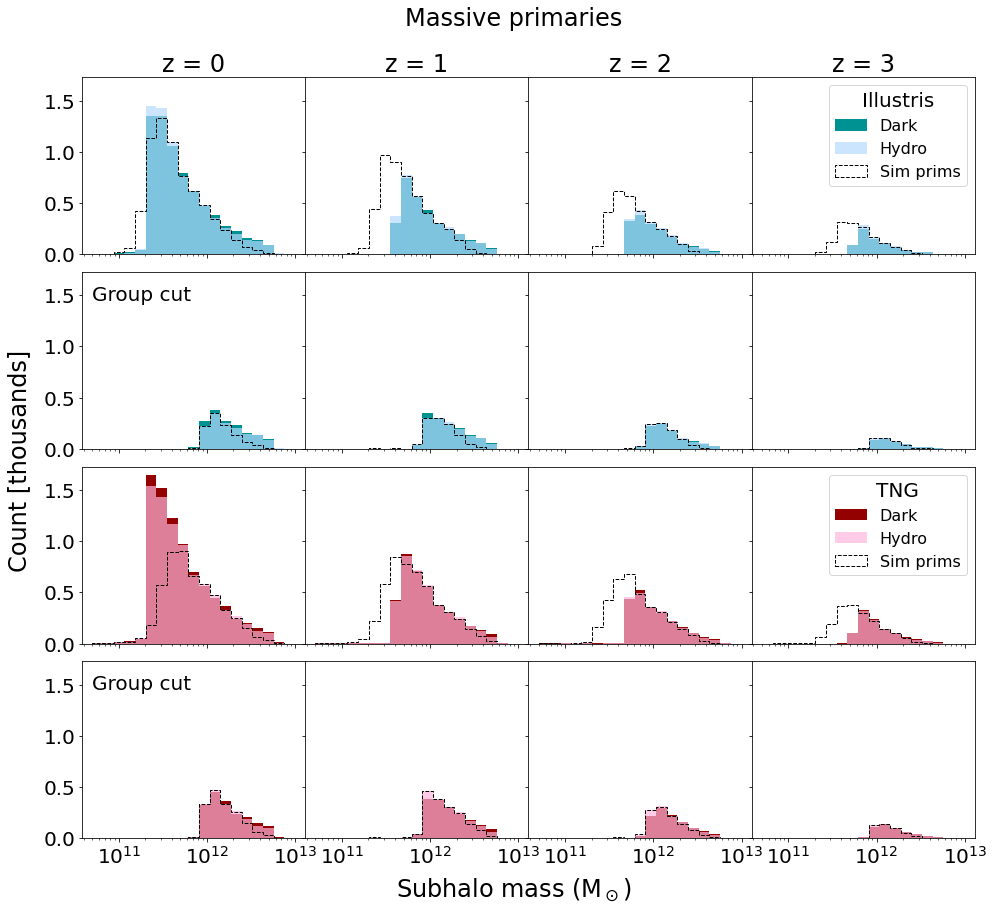

In [177]:
# primary log
fig, ax = plt.subplots(4,4,figsize=(16,14),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(10.7,13,20)
weight = 1000
key = "Sub1 Mass"
size = "massive"

for i in range(4):
    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')

    masses = get_primaries("Illustris","dark", size, i, key, median=True)*1e10

    masses_h = get_primaries("Illustris","hydro", size, i, key, median=True)*1e10
    
    masses_sim = get_primaries_simstell("Illustris", size, i, key)*1e10
    
    ax[0][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    masses = get_primaries("Illustris","dark", size, i, key, median=True,groupCut=True)*1e10

    masses_h = get_primaries("Illustris","hydro", size, i, key, median=True,groupCut=True)*1e10
    
    masses_sim = get_primaries_simstell("Illustris", size, i, key,groupCut=True)*1e10
    
    ax[1][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    
    masses = get_primaries("TNG","dark", size, i, key, median=True)*1e10
    
    masses_h = get_primaries("TNG","hydro", size, i, key, median=True)*1e10

    masses_sim = get_primaries_simstell("TNG",  size, i, key)*1e10
    
    ax[2][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[2][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[2][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    
    masses = get_primaries("TNG","dark", size, i, key, median=True,groupCut=True)*1e10
    
    masses_h = get_primaries("TNG","hydro", size, i, key, median=True,groupCut=True)*1e10

    masses_sim = get_primaries_simstell("TNG",  size, i, key,groupCut=True)*1e10
    
    ax[3][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[3][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[3][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')


ax[0][3].legend(title="Illustris",fontsize=16)
ax[2][3].legend(title="TNG",fontsize=16)
ax[1][0].text(5e10,1.45,"Group cut")
ax[3][0].text(5e10,1.45,"Group cut")

fig.suptitle("Massive primaries",y=0.95)
fig.supxlabel(r"Subhalo mass ($\rm M_\odot$)",y=0.06)
fig.supylabel("Count [thousands]",x=0.060)

plt.savefig(f"../plots/pairs_plots/dist_Mh_med_m1.png",bbox_inches='tight',facecolor="white")
plt.show()

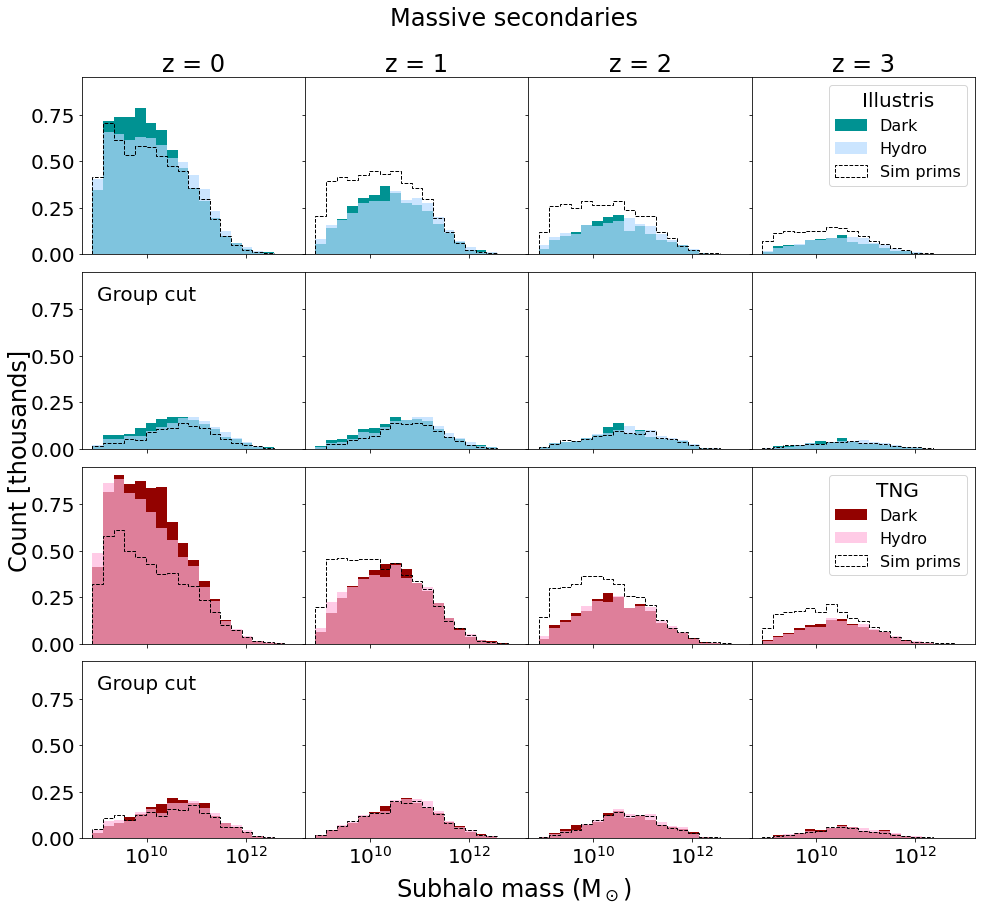

In [178]:
# secondary log
fig, ax = plt.subplots(4,4,figsize=(16,14),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(8.9,13,20)
weight = 1000
key = "Sub2 Mass"
size = "massive"

for i in range(4):
    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')

    masses = get_secondaries("Illustris","dark", size, i, key, median=True)*1e10
    masses_h = get_secondaries("Illustris","hydro", size, i, key, median=True)*1e10    
    masses_sim = get_secondaries_simstell("Illustris", size, i, key)*1e10
    
    ax[0][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    
    masses = get_secondaries("Illustris","dark", size, i, key, median=True,groupCut=True)*1e10
    masses_h = get_secondaries("Illustris","hydro", size, i, key, median=True,groupCut=True)*1e10
    masses_sim = get_secondaries_simstell("Illustris", size, i, key,groupCut=True)*1e10
    
    ax[1][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    
    masses = get_secondaries("TNG","dark", size, i, key, median=True)*1e10
    masses_h = get_secondaries("TNG","hydro", size, i, key, median=True)*1e10
    masses_sim = get_secondaries_simstell("TNG",  size, i, key)*1e10
    
    ax[2][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[2][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[2][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    

    masses = get_secondaries("TNG","dark", size, i, key, median=True,groupCut=True)*1e10
    masses_h = get_secondaries("TNG","hydro", size, i, key, median=True,groupCut=True)*1e10
    masses_sim = get_secondaries_simstell("TNG",  size, i, key,groupCut=True)*1e10
    
    ax[3][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[3][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[3][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')


ax[0][3].legend(title="Illustris",fontsize=16)
ax[2][3].legend(title="TNG",fontsize=16)
ax[1][0].text(1e9,0.8,"Group cut")
ax[3][0].text(1e9,0.8,"Group cut")

fig.suptitle("Massive secondaries",y=0.95)
fig.supxlabel(r"Subhalo mass ($\rm M_\odot$)",y=0.06)
fig.supylabel("Count [thousands]",x=0.060)

plt.savefig(f"../plots/pairs_plots/dist_Mh_med_m2.png",bbox_inches='tight',facecolor="white")
plt.show()

## Stellar mass

### Dwarfs

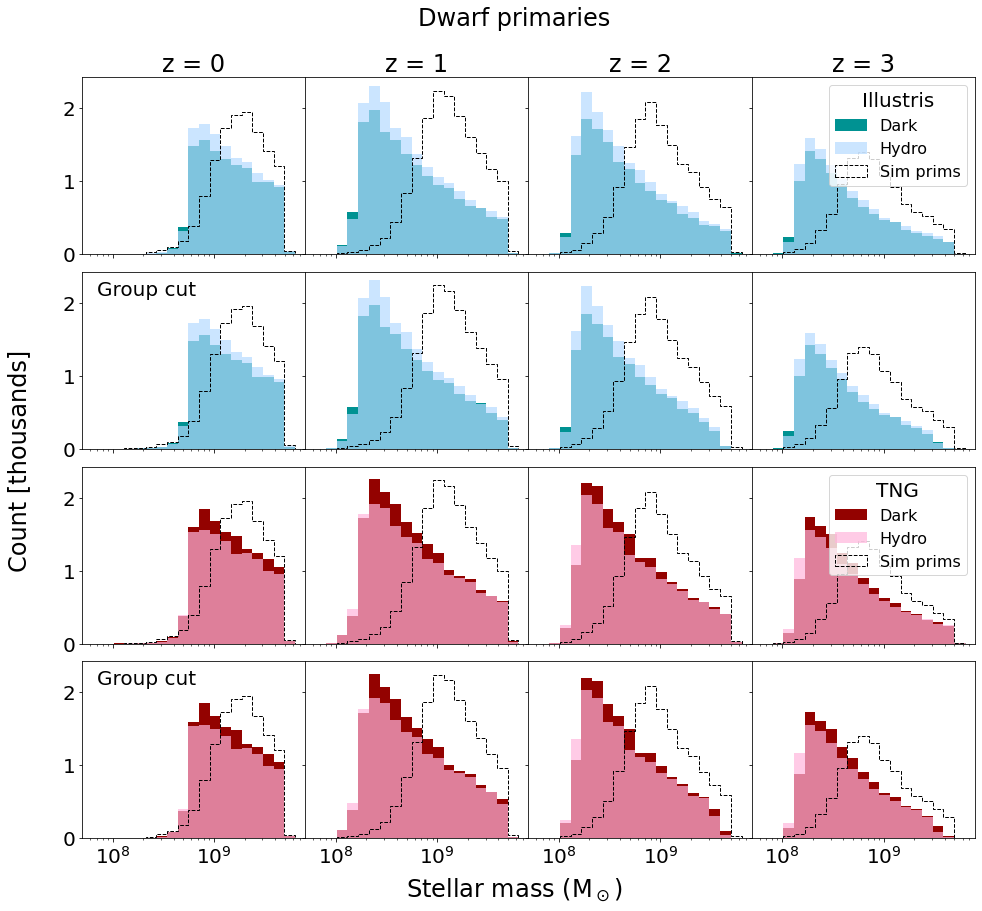

In [184]:
# dwarf primary 

# primary log
fig, ax = plt.subplots(4,4,figsize=(16,14),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(7.8,9.8,20)
weight = 1000
key = "Sub1 Stellar Mass"
size = "dwarf"

for i in range(4):
    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')

    masses = get_primaries("Illustris","dark", size, i, key, median=True)*1e10
    masses_h = get_primaries("Illustris","hydro", size, i, key, median=True)*1e10    
    masses_sim = get_primaries_simstell("Illustris",size,i, "Sub1 MassType")[:,4]*1e10
    
    ax[0][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    masses = get_primaries("Illustris","dark", size, i, key, median=True,groupCut=True)*1e10
    masses_h = get_primaries("Illustris","hydro", size, i, key, median=True,groupCut=True)*1e10
    masses_sim = get_primaries_simstell("Illustris",size,i, "Sub1 MassType",groupCut=True)[:,4]*1e10    
    
    ax[1][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    
    masses = get_primaries("TNG","dark", size, i, key, median=True)*1e10
    masses_h = get_primaries("TNG","hydro", size, i, key, median=True)*1e10
    masses_sim = get_primaries_simstell("Illustris",size,i, "Sub1 MassType")[:,4]*1e10    
    
    ax[2][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[2][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[2][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    
    masses = get_primaries("TNG","dark", size, i, key, median=True,groupCut=True)*1e10
    masses_h = get_primaries("TNG","hydro", size, i, key, median=True,groupCut=True)*1e10
    masses_sim = get_primaries_simstell("Illustris",size,i, "Sub1 MassType",groupCut=True)[:,4]*1e10   
    
    ax[3][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[3][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[3][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')


ax[0][3].legend(title="Illustris",fontsize=16)
ax[2][3].legend(title="TNG",fontsize=16)
ax[1][0].text(7e7,2.1,"Group cut")
ax[3][0].text(7e7,2.1,"Group cut")

fig.suptitle("Dwarf primaries",y=0.95)
fig.supxlabel(r"Stellar mass ($\rm M_\odot$)",y=0.06)
fig.supylabel("Count [thousands]",x=0.060)

plt.savefig(f"../plots/pairs_plots/dist_Ms_med_d1.png",bbox_inches='tight',facecolor="white")
plt.show()

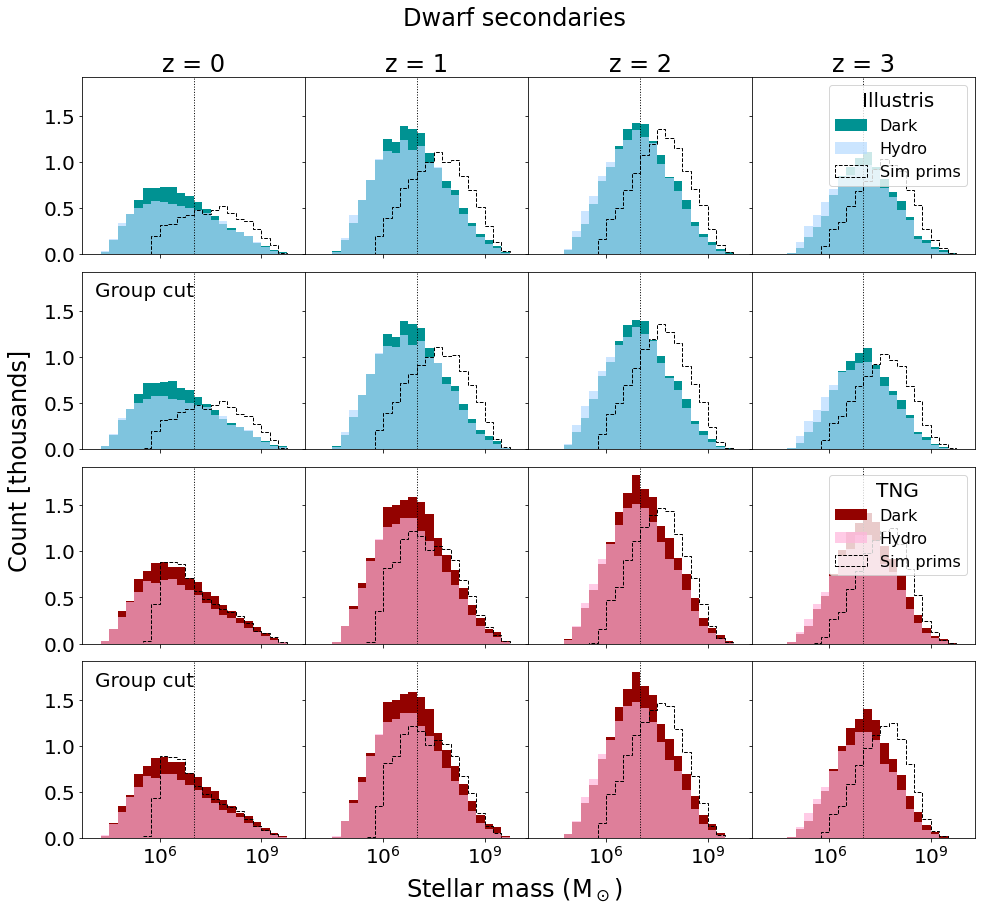

In [193]:
# secondary log
fig, ax = plt.subplots(4,4,figsize=(16,14),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(4,10,25)
weight = 1000
key = "Sub2 Stellar Mass"
size = "dwarf"

for i in range(4):
    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')

    masses = get_secondaries("Illustris","dark", size, i, key, median=True)*1e10
    masses_h = get_secondaries("Illustris","hydro", size, i, key, median=True)*1e10    
    masses_sim = get_secondaries_simstell("Illustris",size,i, "Sub2 MassType")[:,4]*1e10
    
    
    ax[0][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    
    masses = get_secondaries("Illustris","dark", size, i, key, median=True,groupCut=True)*1e10
    masses_h = get_secondaries("Illustris","hydro", size, i, key, median=True,groupCut=True)*1e10
    masses_sim = get_secondaries_simstell("Illustris",size,i, "Sub2 MassType",groupCut=True)[:,4]*1e10
    
    ax[1][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    
    masses = get_secondaries("TNG","dark", size, i, key, median=True)*1e10
    masses_h = get_secondaries("TNG","hydro", size, i, key, median=True)*1e10
    masses_sim = get_secondaries_simstell("TNG",size,i, "Sub2 MassType")[:,4]*1e10
    
    ax[2][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[2][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[2][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    

    masses = get_secondaries("TNG","dark", size, i, key, median=True,groupCut=True)*1e10
    masses_h = get_secondaries("TNG","hydro", size, i, key, median=True,groupCut=True)*1e10
    masses_sim = get_secondaries_simstell("TNG",size,i, "Sub2 MassType",groupCut=True)[:,4]*1e10
    
    ax[3][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[3][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[3][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

for i in range(4):
    for j in range(4):
        ax[i][j].axvline(1e7,linestyle='dotted',color='black',lw=1)

ax[0][3].legend(title="Illustris",fontsize=16)
ax[2][3].legend(title="TNG",fontsize=16)
ax[1][0].text(1.2e4,1.65,"Group cut")
ax[3][0].text(1.2e4,1.65,"Group cut")

fig.suptitle("Dwarf secondaries",y=0.95)
fig.supxlabel(r"Stellar mass ($\rm M_\odot$)",y=0.06)
fig.supylabel("Count [thousands]",x=0.060)

plt.savefig(f"../plots/pairs_plots/dist_Ms_med_d2.png",bbox_inches='tight',facecolor="white")
plt.show()


### Massive

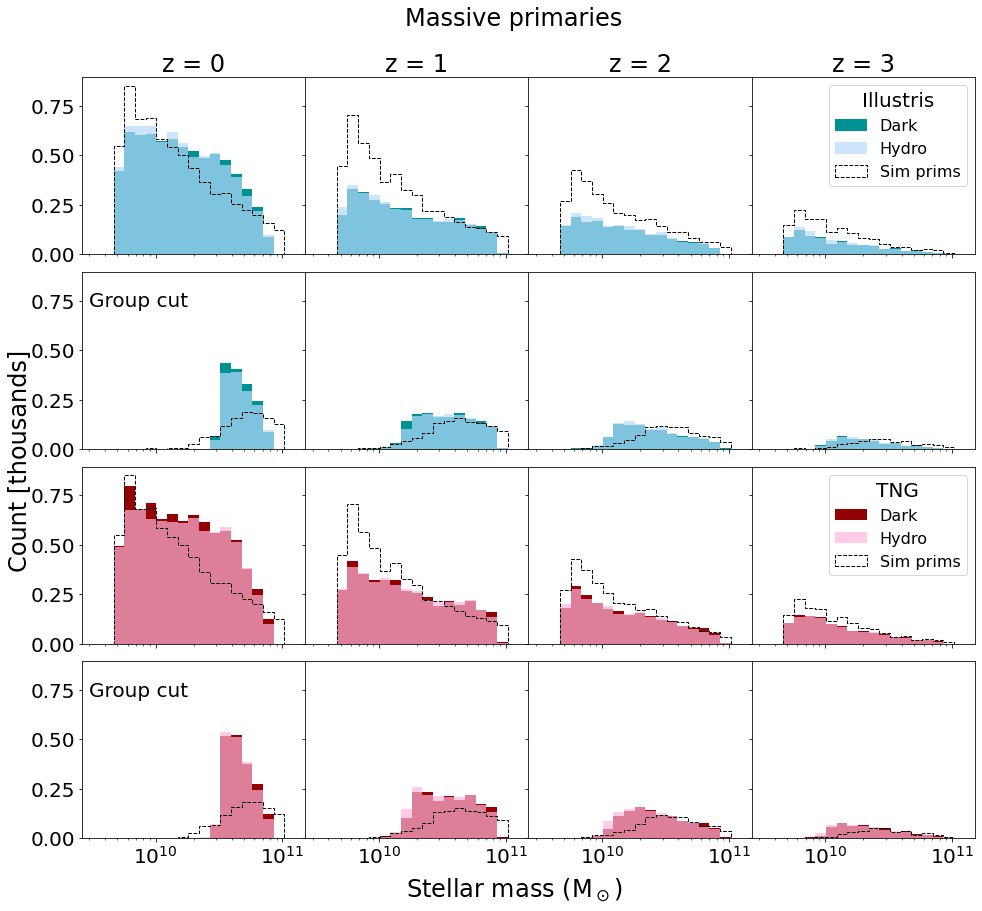

In [198]:
# massive primary 
fig, ax = plt.subplots(4,4,figsize=(16,14),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(9.5,11.1,20)
weight = 1000
key = "Sub1 Stellar Mass"
size = "massive"

for i in range(4):
    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')

    masses = get_primaries("Illustris","dark", size, i, key, median=True)*1e10
    masses_h = get_primaries("Illustris","hydro", size, i, key, median=True)*1e10    
    masses_sim = get_primaries_simstell("Illustris",size,i, "Sub1 MassType")[:,4]*1e10
    
    ax[0][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    masses = get_primaries("Illustris","dark", size, i, key, median=True,groupCut=True)*1e10
    masses_h = get_primaries("Illustris","hydro", size, i, key, median=True,groupCut=True)*1e10
    masses_sim = get_primaries_simstell("Illustris",size,i, "Sub1 MassType",groupCut=True)[:,4]*1e10    
    
    ax[1][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    
    masses = get_primaries("TNG","dark", size, i, key, median=True)*1e10
    masses_h = get_primaries("TNG","hydro", size, i, key, median=True)*1e10
    masses_sim = get_primaries_simstell("Illustris",size,i, "Sub1 MassType")[:,4]*1e10    
    
    ax[2][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[2][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[2][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    
    masses = get_primaries("TNG","dark", size, i, key, median=True,groupCut=True)*1e10
    masses_h = get_primaries("TNG","hydro", size, i, key, median=True,groupCut=True)*1e10
    masses_sim = get_primaries_simstell("Illustris",size,i, "Sub1 MassType",groupCut=True)[:,4]*1e10   
    
    ax[3][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[3][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[3][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')


ax[0][3].legend(title="Illustris",fontsize=16)
ax[2][3].legend(title="TNG",fontsize=16)
ax[1][0].text(3e9,0.72,"Group cut")
ax[3][0].text(3e9,0.72,"Group cut")

fig.suptitle("Massive primaries",y=0.95)
fig.supxlabel(r"Stellar mass ($\rm M_\odot$)",y=0.06)
fig.supylabel("Count [thousands]",x=0.060)

# plt.savefig(f"../plots/pairs_plots/dist_Ms_med_m1.png",bbox_inches='tight',facecolor="white")
plt.show()

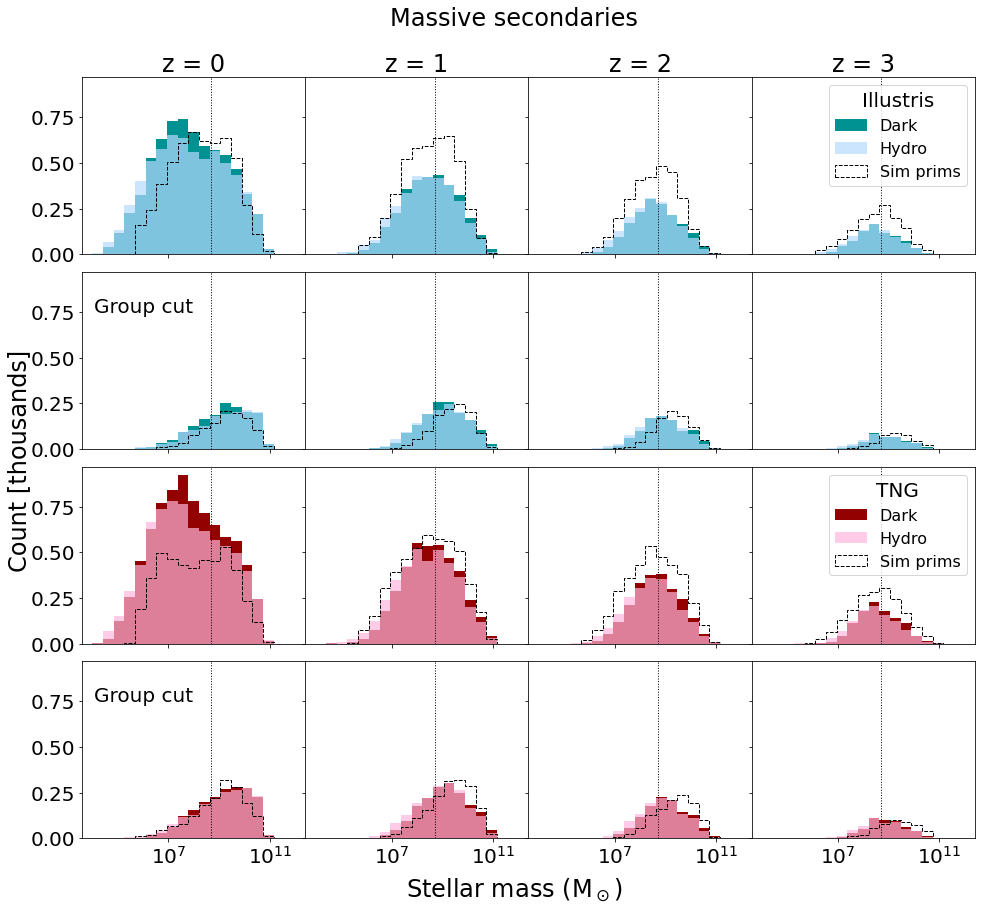

In [201]:
# secondary log
fig, ax = plt.subplots(4,4,figsize=(16,14),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.logspace(4,12,20)
weight = 1000
key = "Sub2 Stellar Mass"
size = "massive"

for i in range(4):
    ax[0][i].set_title(f"z = {i}")
    ax[0][i].set_xscale('log')

    masses = get_secondaries("Illustris","dark", size, i, key, median=True)*1e10
    masses_h = get_secondaries("Illustris","hydro", size, i, key, median=True)*1e10    
    masses_sim = get_secondaries_simstell("Illustris",size,i, "Sub2 MassType")[:,4]*1e10
    
    
    ax[0][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[0][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    
    masses = get_secondaries("Illustris","dark", size, i, key, median=True,groupCut=True)*1e10
    masses_h = get_secondaries("Illustris","hydro", size, i, key, median=True,groupCut=True)*1e10
    masses_sim = get_secondaries_simstell("Illustris",size,i, "Sub2 MassType",groupCut=True)[:,4]*1e10
    
    ax[1][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
    ax[1][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    
    masses = get_secondaries("TNG","dark", size, i, key, median=True)*1e10
    masses_h = get_secondaries("TNG","hydro", size, i, key, median=True)*1e10
    masses_sim = get_secondaries_simstell("TNG",size,i, "Sub2 MassType")[:,4]*1e10
    
    ax[2][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[2][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[2][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')
    

    masses = get_secondaries("TNG","dark", size, i, key, median=True,groupCut=True)*1e10
    masses_h = get_secondaries("TNG","hydro", size, i, key, median=True,groupCut=True)*1e10
    masses_sim = get_secondaries_simstell("TNG",size,i, "Sub2 MassType",groupCut=True)[:,4]*1e10
    
    ax[3][i].hist(masses,weights=np.ones(len(masses))/weight, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[3][i].hist(masses_h,weights=np.ones(len(masses_h))/weight, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
    ax[3][i].hist(masses_sim,weights=np.ones(len(masses_sim))/weight, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

for i in range(4):
    for j in range(4):
        ax[i][j].axvline(5e8,linestyle='dotted',color='black',lw=1)

ax[0][3].legend(title="Illustris",fontsize=16)
ax[2][3].legend(title="TNG",fontsize=16)
ax[1][0].text(1.2e4,0.75,"Group cut")
ax[3][0].text(1.2e4,0.75,"Group cut")

fig.suptitle("Massive secondaries",y=0.95)
fig.supxlabel(r"Stellar mass ($\rm M_\odot$)",y=0.06)
fig.supylabel("Count [thousands]",x=0.060)

plt.savefig(f"../plots/pairs_plots/dist_Ms_med_m2.png",bbox_inches='tight',facecolor="white")
plt.show()


# Separations

# Other? 

In [122]:
sim="Illustris"
phys="dark"
size = "dwarf" 
z = 0 
key = "Sub2 Mass"
median=True

In [124]:
    
zloc = np.where( zs['z'] == z)[0]

if sim == "Illustris":
    snapshot = zs['zill'][zloc][0]
elif sim == "TNG":
    snapshot = zs['ztng'][zloc][0]      
      

In [125]:
  
pair_path = f"{sim}_{snapshot}_10.hdf5"

pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")

In [128]:
np.array(paired['Realization'])

array([-1,  0,  1, ...,  8,  9, 10])

In [129]:
paired = pair_data["pairs"][phys]
paired_stells = np.array(paired["Sub1 Stellar Mass"])
paired_prims = get_primmask(paired_stells, size)
paired_group = get_groupmask(np.array(paired["Group Mass"]), size)
paired_median = np.array( paired['Realization'] ) ==-1

print(np.sum(paired_median))
print(np.sum(paired_prims))
print(np.sum(paired_group))

15264
101274
144516


In [123]:
    
    # get data for paired halos next
    paired = pair_data["pairs"][phys]
    paired_stells = np.array(paired["Sub1 Stellar Mass"])
    paired_prims = get_primmask(paired_stells, size)
    paired_group = get_groupmask(np.array(paired["Group Mass"]), size)
    paired_median = np.array( paired['Realization'] ) ==-1
    
    if groupCut & median:
        paired_mask = paired_prims & paired_group & paired_median
        
    elif groupCut:
        paired_mask = paired_prims & paired_group 
        
    elif median:
        paired_mask = paired_prims & paired_median
        
    else:
        paired_mask = paired_prims       
    
    # get the data for those secondaries!
    seco_key = np.array(paired[key])[paired_prims]

    return seco_key

NameError: name 'groupCut' is not defined

In [121]:
prim = get_primaries("Illustris","dark","dwarf",0, "Sub1 Mass", median=True)*1e10
sec = get_secondaries("Illustris","dark", "dwarf", 0, "Sub2 Mass", median=True)*1e10

print(len(prim))
print(len(sec))

11573
101274


In [107]:
def get_secondaries_simstell(sim, size, z, key="Sub2 Mass", groupCut=False):
    zloc = np.where( zs['z'] == z)[0]
    
    if sim == "Illustris":
        snapshot = zs['zill'][zloc][0]
    elif sim == "TNG":
        snapshot = zs['ztng'][zloc][0]      
        
    pair_path = f"{sim}_{snapshot}_simstars.hdf5"
    pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
    
    # get data for paired halos 
    paired = pair_data["paired"]["hydro"]
    paired_stells = np.array(paired["Sub1 Stellar Mass"])
    paired_prims = get_primmask(paired_stells, size)
    paired_group = get_groupmask(np.array(paired["Group Mass"]), size)

    if groupCut:
        paired_mask = paired_prims & paired_group
    else:
        paired_mask = paired_prims
        
    seco_key = np.array(paired[key])[paired_mask]

    return seco_key


In [115]:

sec = get_secondaries_simstell("TNG",  size, 0, key)*1e10

In [116]:
len(sec)

9988

In [ ]:
pair_data.paired

In [101]:
print("Num unpaired prims",np.sum(unpaired_prims))
print("Num paired prims",np.sum(paired_prims))

Num unpaired prims 5272
Num paired prims 7519


In [98]:
sim="Illustris"
snapshot = 135
size = "dwarf"

pair_path = f"{sim}_{snapshot}_simstars.hdf5"
pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")

# get data for unpaired halos first
unpaired = pair_data["unpaired"]["hydro"]
unpaired_stells = np.array(unpaired["Sub1 Stellar Mass"])
unpaired_prims = get_primmask(unpaired_stells, size)
unpaired_group = get_groupmask(np.array(unpaired["Group Mass"]), size)

# get data for paired halos next
paired = pair_data["paired"]["hydro"]
paired_stells = np.array(paired["Sub1 Stellar Mass"])
paired_prims = get_primmask(paired_stells, size)
paired_group = get_groupmask(np.array(paired["Group Mass"]), size)    



In [50]:
def get_primaries(sim, phys, size, z, key="Sub1 Mass", groupCut=False, median=False):
    zloc = np.where( zs['z'] == z)[0]
    
    if sim == "Illustris":
        snapshot = zs['zill'][zloc][0]
    elif sim == "TNG":
        snapshot = zs['ztng'][zloc][0]      
        
    pair_path = f"{sim}_{snapshot}_10.hdf5"
    pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")
    
    # get data for unpaired halos first
    unpaired = pair_data["unpaired"][phys]
    unpaired_stells = np.array(unpaired["Sub1 Stellar Mass"])
    unpaired_prims = get_primmask(unpaired_stells, size)
    unpaired_group = get_groupmask(np.array(unpaired["Group Mass"]), size)
    unpaired_median = np.array(unpaired['Realization']) ==-1
    
    # get data for paired halos next
    paired = pair_data["pairs"][phys]
    paired_stells = np.array(paired["Sub1 Stellar Mass"])
    paired_prims = get_primmask(paired_stells, size)
    paired_group = get_groupmask(np.array(paired["Group Mass"]), size)
    paired_median = np.array(paired['Realization']) ==-1
    
    if groupCut & median:
        unpaired_mask = unpaired_prims & unpaired_group & unpaired_median
        paired_mask = paired_prims & group_mask & median_mask
        
    elif groupCut:
        unpaired_mask = unpaired_prims & unpaired_group 
        paired_mask = paired_prims & paired_group 
        
    elif median:
        print(sum(paired_median))
        print(sum(unpaired_median))
        unpaired_mask = unpaired_prims & unpaired_median
        paired_mask = paired_prims & paired_median
        
    else:
        unpaired_mask = unpaired_prims        
        paired_mask = paired_prims       
        
    unpaired_key = np.array(unpaired[key])[unpaired_mask]    
    paired_key = np.array(paired[key])[paired_mask]

    catkey = np.concatenate((unpaired_key,paired_key))

    return catkey

In [39]:
pair_path = f"Illustris_135_10.hdf5"
pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")

In [48]:
unpaired = pair_data["unpaired"]["dark"]
unpaired_stells = np.array(unpaired["Sub1 Stellar Mass"])
unpaired_prims = get_primmask(unpaired_stells, "dwarf")
unpaired_group = get_groupmask(np.array(unpaired["Group Mass"]), "dwarf")
unpaired_median = np.array( unpaired['Realization']) ==-1

In [49]:
np.sum(unpaired_median)

3316

In [47]:
np.array(unpaired['Realization'])

array([-1,  0,  1, ...,  8,  9, 10])

In [52]:
get_primaries("Illustris","dark","dwarf",i, "Sub1 Mass",median=True)

10297
691


array([36.94893555, 34.16097435, 32.46729211, ...,  7.11994076,
        6.58671626,  6.83941489])

In [21]:
sim = "Illustris"
snapshot = 135
pair_path = f"{sim}_{snapshot}_simstars.hdf5"
pair_data = h5py.File(f"{paths.path_pairs}{pair_path}", "r")

In [22]:
pair_data.keys()

<KeysViewHDF5 ['Header', 'paired', 'unpaired']>

In [23]:
# get data for unpaired halos first
unpaired = pair_data["unpaired"]["hydro"]
unpaired_stells = np.array(unpaired["Sub1 Stellar Mass"])
unpaired_prims = get_primmask(unpaired_stells, size)
unpaired_group = get_groupmask(np.array(unpaired["Group Mass"]), size)

# get data for paired halos next
paired = pair_data["paired"]["hydro"]
paired_stells = np.array(paired["Sub1 Stellar Mass"])
paired_prims = get_primmask(paired_stells, size)
paired_group = get_groupmask(np.array(paired["Group Mass"]), size)    

if groupCut:
    unpaired_mask = unpaired_prims & unpaired_group
    paired_mask = paired_prims & paired_group

unpaired_key = np.array(unpaired[key])[unpaired_mask]
paired_key = np.array(paired[key])[paired_mask]

catkey = np.concatenate((unpaired_key,paired_key))

NameError: name 'size' is not defined

# signs of the apocalypse 

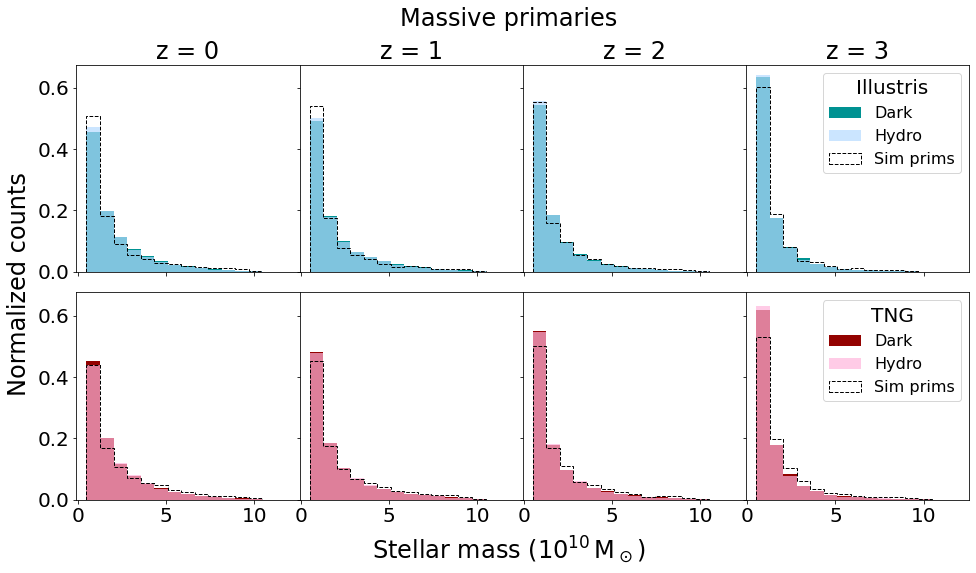

In [164]:
# Make dists for massive primary masses

fig, ax = plt.subplots(2,4,figsize=(16,8),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0,hspace=0.1)
bins = np.linspace(0.5,12,16)

key = "Sub1 Stellar Mass"

for i in range(4):
    masses = get_primaries("Illustris","dark","massive",i, key)
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("Illustris","hydro","massive",i, key)
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_primaries("Illustris","hydro","massive",i, "Sub1 MassType")[:,4]
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    masses_sim2 = get_primaries_simstell("Illustris","hydro","massive",i, "Sub1 MassType")[:,4]
    massweights_sim2 = np.ones(len(masses_sim2))/len(masses_sim2)
    
    ax[0][i].hist(masses, weights=massweights, bins=bins, color=palette['Illustris dark'],label='Dark')
    ax[0][i].hist(masses_h, weights=massweights_h, bins=bins, color=palette['Illustris hydro'],alpha=0.7,label='Hydro')
#     ax[0][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",label='Hydro *')
    ax[0][i].hist(masses_sim2, weights=massweights_sim2, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')

    ax[0][i].set_title(f"z = {i}")
#     ax[0][i].set_xticks(np.arange(0,0.7,0.2))

    
    masses = get_primaries("TNG","dark","massive",i, key)
    massweights = np.ones(len(masses))/len(masses)
    
    masses_h = get_primaries("TNG","hydro","massive",i, key)
    massweights_h = np.ones(len(masses_h))/len(masses_h)
    
    masses_sim = get_primaries("TNG","hydro","massive",i, "Sub1 MassType")[:,4]
    massweights_sim = np.ones(len(masses_sim))/len(masses_sim)
    
    masses_sim2 = get_primaries_simstell("TNG","hydro","massive",i, "Sub1 MassType")[:,4]
    massweights_sim2 = np.ones(len(masses_sim2))/len(masses_sim2)
    
    ax[1][i].hist(masses,weights=massweights, bins=bins, color=palette['TNG dark'],label='Dark')
    ax[1][i].hist(masses_h,weights=massweights_h, bins=bins, color=palette['TNG hydro'],alpha=0.7,label='Hydro')
#     ax[1][i].hist(masses_sim, weights=massweights_sim, histtype='step', bins=bins, color="black",label='Hydro *')
    ax[1][i].hist(masses_sim2, weights=massweights_sim2, histtype='step', bins=bins, color="black",linestyle='dashed',label='Sim prims')


ax[0][3].legend(title="Illustris",fontsize=16)
ax[1][3].legend(title="TNG",fontsize=16)

# fig.text(0.14,0.82,"Massive primaries")

fig.suptitle("Massive primaries")
fig.supxlabel(r"Stellar mass ($10^{10}\rm \, M_\odot$)")
fig.supylabel("Normalized counts",x=0.065)
plt.savefig(f"../plots/pairs_plots/distributions_stellarmass_massive.png",bbox_inches='tight',facecolor="white")
plt.show()

In [40]:
import sys
import h5py
import numpy as np
from utils.get_groups import GetGroups
from utils.paths import SetupPaths
from vectorCorrection import vectorCorrection as vector

snapshot = 135
sim = "Illustris"

paths = SetupPaths()

## find subhalos for this simulation and snapshot #
subhalo_path = f"{sim}_{snapshot}.hdf5"
subhalo_data = h5py.File(f"{paths.path_subhalos}{subhalo_path}", "r")

In [41]:
redshift = subhalo_data["Header"].attrs["Redshift"]
scale = 1 / (1 + redshift)

units_dict = {
    "Group ID":"Group Number in Subfind Catalogs", 
    "Group Mass":"Physical mass from Group_M_TopHat200 -- 1e10 Msun",
    "Group Radius":"Physical radius from Group_R_TopHat200 -- kpc",
    "Group Nsubs":"Number of subhalos in group",
    "Sub1 ID":  "Subhalo ID at current snapshot",
    "Sub2 ID":  "Subhalo ID at current snapshot",
    "Sub1 Mass": "Subhalo mass at current snapshot -- 1e10 Msun",
    "Sub2 Mass": "Subhalo mass at current snapshot -- 1e10 Msun",
    "Sub1 Stellar Mass": "Stellar masses from abundance matching -- 1e10 Msun",
    "Sub2 Stellar Mass": "Stellar masses from abundance matching -- 1e10 Msun",
    "Sub1 Pos": "Subhalo physical position in box x,y,z -- kpc",
    "Sub2 Pos": "Subhalo physical position in box x,y,z -- kpc",
    "Sub1 Vel": "Subhalo velocity in vx, vy, vz -- km/s",
    "Sub2 Vel": "Subhalo velocity in vx, vy, vz -- km/s",
    "Sub1 MassType": "Mass of bound particles - gas, DM, empty, tracers, stars, BHs -- in 1e10 Msun",
    "Sub2 MassType": "Mass of bound particles - gas, DM, empty, tracers, stars, BHs -- in 1e10 Msun",
    "Separation": "Physical separation between primary and secondary in kpc",
    "RelVel": "Relative velocity between primary and secondary in km/s",
    "Stellar Mass Ratio": "Stellar mass ratio of secondary over primary", # in this case- it's by primary subhalo mass
    "Realization": "Stellar mass realization (0-1000)",
    "Sub1 BHMass": "Sum of the masses of all blackholes -- 1e10 Msun",
    "Sub2 BHMass": "Sum of the masses of all blackholes -- 1e10 Msun",
    "Sub1 BHMdot": "Instantaneous accretion rates of all blackholes -- 1e10 Msun / 0.978Gyr",
    "Sub2 BHMdot": "Instantaneous accretion rates of all blackholes -- 1e10 Msun / 0.978Gyr",
    "Sub1 SFR": "Sum of the individual SFRs of all gas cells in subhalo -- Msun / yr",
    "Sub2 SFR": "Sum of the individual SFRs of all gas cells in subhalo -- Msun / yr",
    "Sub1 SFRinRad": "Sum of SFRs of all gas cells within twice the stellar half mass radius -- Msun / yr",
    "Sub2 SFRinRad": "Sum of SFRs of all gas cells within twice the stellar half mass radius -- Msun / yr",
    "Sub1 GasMetallicity": "Mz/Mtot, where Z = any element above He within 2x stellar half mass radius -- unitless",
    "Sub2 GasMetallicity": "Mz/Mtot, where Z = any element above He within 2x stellar half mass radius -- unitless",
    "TripleFlag": "0 if no tertiary with mass ratio > 1:10 of secondary, 1 if large tertiary, 2 if other problem occurred"
    }

In [42]:
class SkipFragmentedSubhalo(Exception): pass

def testthird(shortlist, stells, stel2, real):
    stells_sans_prim = np.where(stells==np.max(stells), 0, stells)
    stells_sans_two = np.where(stells_sans_prim==np.max(stells_sans_prim), 0, stells_sans_prim)
    
    if all(stells_sans_two == 0):
        print("Error in testthird")
        raise SkipFragmentedSubhalo()

    else:
        tertiary_loc = np.where(meds==np.max(stells_sans_two))
        
        if real == -1:
            stel3 = shortlist['Subhalo Med Stellar Mass'][tertiary_loc][0] 
        else:
            stel3 = shortlist['Subhalo Stellar Masses'][tertiary_loc][0][real]

        ratio = stel3 / stel2 

        if ratio > 1/10:
            return 1
        else:
            return 2

phys = 'hydro'

pair_data = {}
pair_data = {"Group ID": [], "Group Mass": [], "Group Radius": [], "Group Nsubs": [],
             "Sub1 ID": [], "Sub2 ID": [], "Sub1 Mass": [], "Sub2 Mass": [],
             "Sub1 Stellar Mass": [], "Sub2 Stellar Mass": [], "Stellar Mass Ratio": [],
             "Sub1 Pos": [], "Sub2 Pos": [], "Separation": [],
             "Sub1 Vel": [], "Sub2 Vel": [], "RelVel": [],
             "Sub1 MassType": [], "Sub2 MassType": [],
             "Sub1 BHMass": [], "Sub2 BHMass": [],
             "Sub1 BHMdot": [], "Sub2 BHMdot": [],
             "Sub1 SFR": [], "Sub2 SFR": [],
             "Sub1 SFRinRad": [], "Sub2 SFRinRad": [],
             "Sub1 GasMetallicity": [], "Sub2 GasMetallicity": [],
             "Realization": [], "TripleFlag":[]}

unpaired_data = {}
unpaired_data = {"Group ID": [], "Group Mass": [], "Group Radius": [], "Group Nsubs": [], 
                 "Sub1 ID": [], "Sub1 Mass": [], "Sub1 Stellar Mass": [], "Sub1 MassType": [],
                 "Sub1 Pos": [], "Sub1 Vel": [],
                 "Sub1 BHMass": [], "Sub1 BHMdot": [], "Sub1 SFR": [], "Sub1 SFRinRad": [],
                 "Sub1 GasMetallicity": [], "Realization":[]}
    
subhalo_dictionary = {}

In [43]:
for key,val in subhalo_data[phys].items():
    subhalo_dictionary[key] = np.array(val)

In [44]:
uniqueGroups = np.unique(subhalo_dictionary['Group ID'])


In [47]:
group_mask = subhalo_dictionary['Group ID'] == uniqueGroups[100]
numPassingSubs = len(subhalo_dictionary['Nsubs'][group_mask])

In [48]:
numPassingSubs

50

In [49]:
groupmass = subhalo_dictionary['Group Mass'][group_mask][0]
groupradius = subhalo_dictionary['Group Radius'][group_mask][0]

shortlist = {} # dictionary  of subhalos in group
for key, val in subhalo_dictionary.items():
    shortlist[key] = np.array(val[group_mask])


In [54]:
stells = shortlist["SubhaloMassType"][:,4]
stells

array([1.55738822e+01, 1.35271268e+00, 1.79106776e+00, 6.52544751e-01,
       1.57065848e-01, 4.92488352e-02, 2.72942628e-02, 1.78168213e-02,
       2.04447556e-02, 4.54464746e-03, 5.84220768e-02, 4.55292816e-03,
       1.12670995e-02, 0.00000000e+00, 5.28742120e-03, 8.98128168e-04,
       1.05456893e-04, 0.00000000e+00, 0.00000000e+00, 4.83315935e-03,
       4.26648694e-03, 0.00000000e+00, 1.89996482e-04, 1.24265634e-03,
       9.87609846e-03, 0.00000000e+00, 3.24305264e-04, 0.00000000e+00,
       1.09226444e-03, 3.45261750e-03, 0.00000000e+00, 9.02344626e-05,
       1.94726139e-03, 2.70925904e-03, 0.00000000e+00, 0.00000000e+00,
       1.84699258e-03, 3.62044904e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.61168811e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.79599717e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [55]:
primary_loc = np.where(stells==np.max(stells))

In [56]:
primary_loc

(array([0]),)

In [57]:
stells_sansmax = np.where(stells==np.max(stells), 0, stells)
secondary_loc = np.where(stells==np.max(stells_sansmax))


In [61]:
stells

array([1.55738822e+01, 1.35271268e+00, 1.79106776e+00, 6.52544751e-01,
       1.57065848e-01, 4.92488352e-02, 2.72942628e-02, 1.78168213e-02,
       2.04447556e-02, 4.54464746e-03, 5.84220768e-02, 4.55292816e-03,
       1.12670995e-02, 0.00000000e+00, 5.28742120e-03, 8.98128168e-04,
       1.05456893e-04, 0.00000000e+00, 0.00000000e+00, 4.83315935e-03,
       4.26648694e-03, 0.00000000e+00, 1.89996482e-04, 1.24265634e-03,
       9.87609846e-03, 0.00000000e+00, 3.24305264e-04, 0.00000000e+00,
       1.09226444e-03, 3.45261750e-03, 0.00000000e+00, 9.02344626e-05,
       1.94726139e-03, 2.70925904e-03, 0.00000000e+00, 0.00000000e+00,
       1.84699258e-03, 3.62044904e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.61168811e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.79599717e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [65]:
shortlist["SubhaloMassType"][primary_loc][0][4]

15.573882243850015

#### stel1 = shortlist["SubhaloMassType"][primary_loc][0][realization]
stel2 =  shortlist["SubhaloMassType"][secondary_loc][0][realization]